# libraries

Basic

In [ ]:
import time
startt_time = time.time()
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

Sklearn

In [ ]:
from sklearn.model_selection import train_test_split , cross_val_score , KFold , StratifiedKFold , LeaveOneOut , GridSearchCV , RandomizedSearchCV
from sklearn.linear_model import LinearRegression , LogisticRegression
from sklearn.metrics import mean_squared_error , mean_absolute_error , r2_score ,  accuracy_score , precision_score, recall_score , f1_score , confusion_matrix , roc_curve , roc_auc_score , classification_report
from sklearn.linear_model import Ridge , Lasso
from sklearn.preprocessing import StandardScaler , MinMaxScaler , RobustScaler , LabelEncoder
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeClassifier , DecisionTreeRegressor , plot_tree
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier , StackingClassifier , BaggingClassifier , VotingClassifier , AdaBoostClassifier , GradientBoostingClassifier
from sklearn.tree import plot_tree
from sklearn.feature_selection import RFECV,SelectKBest,f_regression,chi2
from sklearn.pipeline import Pipeline , make_pipeline
from sklearn.decomposition import PCA

Other

In [ ]:
import xgboost as xgb
from collections import Counter
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
import missingno as msng
from copy import deepcopy
import time

# Import and reading the data

In [ ]:
data = pd.read_csv("/content/new_train.csv")

Taking a deepcopy of the data

In [ ]:
df = deepcopy(data)

# EDA








*   **Business Use Case** 🈷




There has been a revenue decline for a Portuguese bank and they would like to know what actions to take. After investigation, they found out that the root cause is that their clients are not depositing as frequently as before. Knowing that term deposits allow banks to hold onto a deposit for a specific amount of time, so banks can invest in higher gain financial products to make a profit. In addition, banks also hold better chance to persuade term deposit clients into buying other products such as funds or insurance to further increase their revenues. As a result, the Portuguese bank would like to identify existing clients that have higher chance to subscribe for a term deposit and focus marketing efforts on such clients.



---





## Data Exploration

In [ ]:
df.head(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,y
0,49,blue-collar,married,basic.9y,unknown,no,no,cellular,nov,wed,227,4,999,0,nonexistent,no
1,37,entrepreneur,married,university.degree,no,no,no,telephone,nov,wed,202,2,999,1,failure,no
2,78,retired,married,basic.4y,no,no,no,cellular,jul,mon,1148,1,999,0,nonexistent,yes
3,36,admin.,married,university.degree,no,yes,no,telephone,may,mon,120,2,999,0,nonexistent,no
4,59,retired,divorced,university.degree,no,no,no,cellular,jun,tue,368,2,999,0,nonexistent,no
5,29,admin.,single,university.degree,no,no,no,cellular,aug,wed,256,2,999,0,nonexistent,no
6,26,student,single,basic.9y,no,no,no,telephone,aug,wed,449,1,999,0,nonexistent,yes
7,30,blue-collar,married,basic.4y,no,yes,no,cellular,nov,wed,126,2,999,0,nonexistent,no
8,50,blue-collar,married,basic.4y,unknown,no,no,telephone,may,fri,574,1,999,0,nonexistent,no
9,33,admin.,single,high.school,no,yes,no,cellular,jul,tue,498,5,999,0,nonexistent,no


In [ ]:
df.tail(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,y
32940,30,management,married,university.degree,no,no,yes,cellular,jul,mon,833,5,999,0,nonexistent,no
32941,28,blue-collar,single,basic.9y,no,yes,no,cellular,apr,thu,315,1,2,1,success,yes
32942,44,entrepreneur,married,professional.course,no,yes,no,telephone,nov,mon,291,3,999,0,nonexistent,no
32943,47,admin.,married,basic.9y,no,yes,no,telephone,nov,fri,64,3,999,0,nonexistent,no
32944,29,blue-collar,married,basic.6y,no,no,no,cellular,may,thu,16,7,999,0,nonexistent,no
32945,28,services,single,high.school,no,yes,no,cellular,jul,tue,192,1,999,0,nonexistent,no
32946,52,technician,married,professional.course,no,yes,no,cellular,nov,fri,64,1,999,1,failure,no
32947,54,admin.,married,basic.9y,no,no,yes,cellular,jul,mon,131,4,999,0,nonexistent,no
32948,29,admin.,married,university.degree,no,no,no,telephone,may,fri,165,1,999,0,nonexistent,no
32949,35,admin.,married,university.degree,no,no,yes,telephone,jun,tue,544,3,999,0,nonexistent,no


Numeric Data

In [ ]:
numeric_data = df.select_dtypes(include=np.number)
numeric_col = numeric_data.columns

print("===="*20)
print("Numeric Features:")
print(numeric_data.head())
print("===="*20)

Numeric Features:
   age  duration  campaign  pdays  previous
0   49       227         4    999         0
1   37       202         2    999         1
2   78      1148         1    999         0
3   36       120         2    999         0
4   59       368         2    999         0


Categorical Data

In [ ]:
categorical_data = df.select_dtypes(exclude=np.number)
categorical_col = categorical_data.columns

print("===="*20)
print("Categorical Features:")
print(categorical_data.head())
print("===="*20)

Categorical Features:
            job   marital          education  default housing loan    contact  \
0   blue-collar   married           basic.9y  unknown      no   no   cellular   
1  entrepreneur   married  university.degree       no      no   no  telephone   
2       retired   married           basic.4y       no      no   no   cellular   
3        admin.   married  university.degree       no     yes   no  telephone   
4       retired  divorced  university.degree       no      no   no   cellular   

  month day_of_week     poutcome    y  
0   nov         wed  nonexistent   no  
1   nov         wed      failure   no  
2   jul         mon  nonexistent  yes  
3   may         mon  nonexistent   no  
4   jun         tue  nonexistent   no  


Check for missing values, duplicated rows, and data types.

In [ ]:
df.info() # memory usage: 4.0+ MB

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32950 entries, 0 to 32949
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   age          32950 non-null  int64 
 1   job          32950 non-null  object
 2   marital      32950 non-null  object
 3   education    32950 non-null  object
 4   default      32950 non-null  object
 5   housing      32950 non-null  object
 6   loan         32950 non-null  object
 7   contact      32950 non-null  object
 8   month        32950 non-null  object
 9   day_of_week  32950 non-null  object
 10  duration     32950 non-null  int64 
 11  campaign     32950 non-null  int64 
 12  pdays        32950 non-null  int64 
 13  previous     32950 non-null  int64 
 14  poutcome     32950 non-null  object
 15  y            32950 non-null  object
dtypes: int64(5), object(11)
memory usage: 4.0+ MB


In [ ]:
for column in df.columns:
    if df[column].dtype == 'object':
        df[column] = df[column].astype('category')

In [ ]:
df.info() # memory usage: 1.9 MB

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32950 entries, 0 to 32949
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   age          32950 non-null  int64   
 1   job          32950 non-null  category
 2   marital      32950 non-null  category
 3   education    32950 non-null  category
 4   default      32950 non-null  category
 5   housing      32950 non-null  category
 6   loan         32950 non-null  category
 7   contact      32950 non-null  category
 8   month        32950 non-null  category
 9   day_of_week  32950 non-null  category
 10  duration     32950 non-null  int64   
 11  campaign     32950 non-null  int64   
 12  pdays        32950 non-null  int64   
 13  previous     32950 non-null  int64   
 14  poutcome     32950 non-null  category
 15  y            32950 non-null  category
dtypes: category(11), int64(5)
memory usage: 1.6 MB


In [ ]:
df.isna().sum()

age            0
job            0
marital        0
education      0
default        0
housing        0
loan           0
contact        0
month          0
day_of_week    0
duration       0
campaign       0
pdays          0
previous       0
poutcome       0
y              0
dtype: int64

In [ ]:
df.drop(columns=['Booking_ID'], inplace=True)

NameError: name 'df' is not defined

In [ ]:
df.duplicated().sum()

In [ ]:
duplicated_rows = df[df.duplicated()]

In [ ]:
df = df.drop_duplicates()

In [ ]:
df.duplicated().sum()

0

In [ ]:
df['y'].value_counts()

no     29230
yes     3712
Name: y, dtype: int64

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,32942.0,40.012810,10.403035,17.0,32.0,38.0,47.0,98.0
duration,32942.0,258.159614,258.995259,0.0,103.0,180.0,319.0,4918.0
campaign,32942.0,2.560804,2.752579,1.0,1.0,2.0,3.0,56.0
pdays,32942.0,962.043440,187.973035,0.0,999.0,999.0,999.0,999.0
previous,32942.0,0.174762,0.499078,0.0,0.0,0.0,0.0,7.0


In [ ]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [ ]:
columns_to_clean = ['marital', 'job', 'housing', 'loan', 'education']

for column in columns_to_clean:
    df[column] = df[column].replace('unknown', np.nan)

df = df.dropna()

In [ ]:
df = df.dropna()

In [ ]:
df.isna().sum()

age            0
job            0
marital        0
education      0
default        0
housing        0
loan           0
contact        0
month          0
day_of_week    0
duration       0
campaign       0
pdays          0
previous       0
poutcome       0
y              0
dtype: int64

***Replace "unknown" with "other" in the "default" column***


In [ ]:
df['default'] = df['default'].replace('unknown', 'other')

***Replace "unknown" with the mode in the "education" column***

In [ ]:
mode_education = df['education'].mode()[0]
df['education'] = df['education'].replace('unknown', mode_education)

count

In [ ]:
columns_to_count = ['marital', 'age', 'job', 'education', 'default', 'housing', 'loan',
                    'month', 'day_of_week', 'duration', 'campaign', 'pdays', 'previous',
                    'poutcome', 'y']

for column in columns_to_count:
    print(f"Value counts for {column}:\n{df[column].value_counts()}\n")


Value counts for marital:
married     18554
single       8597
divorced     3417
Name: marital, dtype: int64

Value counts for age:
31    1478
32    1395
33    1376
35    1331
34    1327
      ... 
89       2
87       1
91       1
17       1
98       1
Name: age, Length: 75, dtype: int64

Value counts for job:
admin.           7931
blue-collar      6870
technician       5097
services         2986
management       2198
retired          1261
entrepreneur     1079
self-employed    1040
housemaid         795
unemployed        759
student           552
Name: job, dtype: int64

Value counts for education:
university.degree      9454
high.school            7372
basic.9y               4670
professional.course    4085
basic.4y               3178
basic.6y               1793
illiterate               16
Name: education, dtype: int64

Value counts for default:
no       24296
other     6269
yes          3
Name: default, dtype: int64

Value counts for housing:
yes    16424
no     14144
Name: housing, 

## Data Visualization

#### NULL


---



<Axes: >

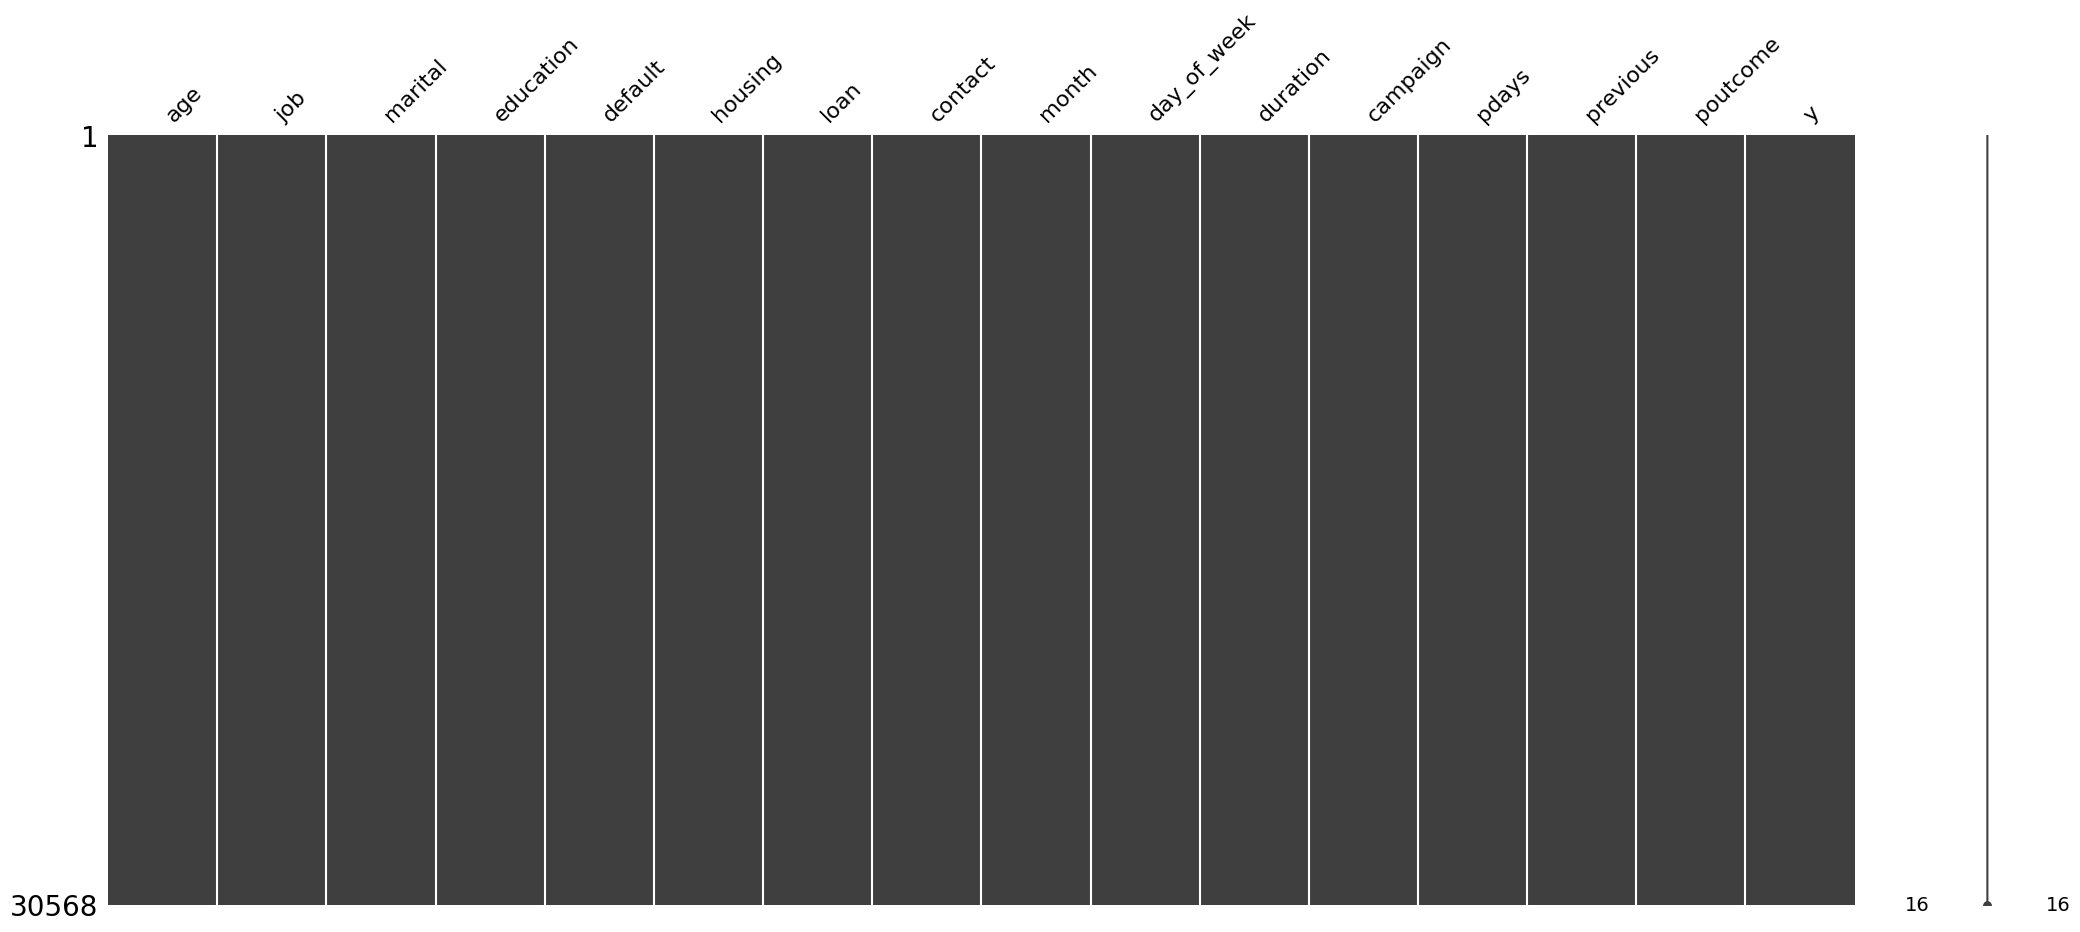

In [ ]:
msng.matrix(df)

#### Check for Outliers


---



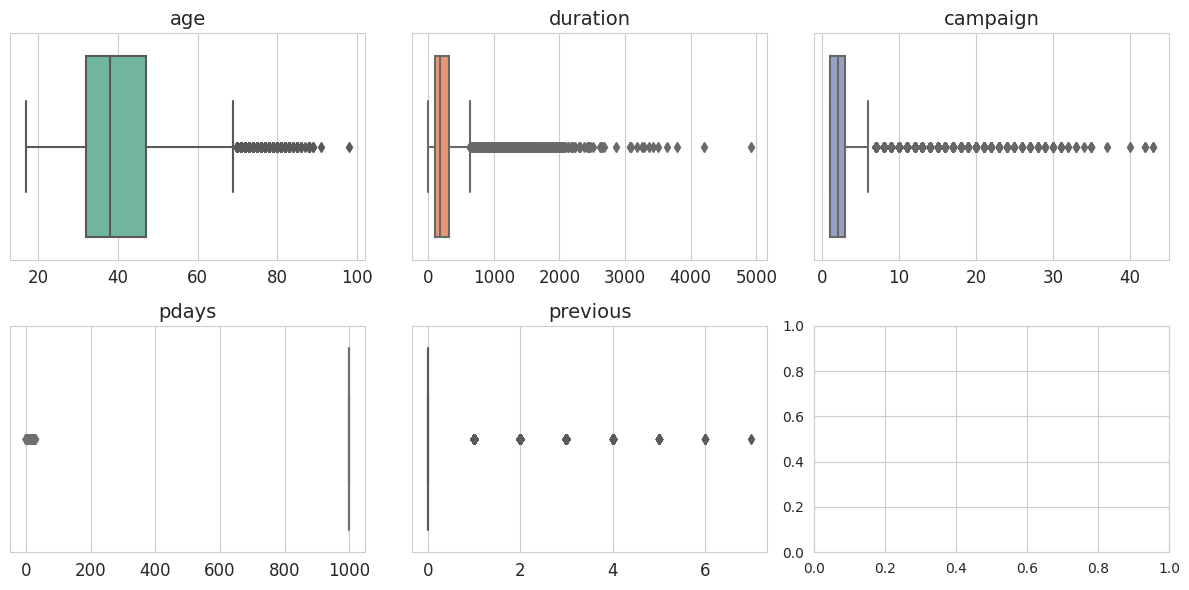

In [ ]:
outliers_check_columns = ['age', 'duration', 'campaign', 'pdays', 'previous']
sns.set_style("whitegrid")
custom_palette = sns.color_palette("Set2")
fig, axes = plt.subplots(2, 3, figsize=(12, 6))
plt.subplots_adjust(wspace=0.4, hspace=0.4)

for i, col in enumerate(outliers_check_columns):
    row, col_num = divmod(i, 3)
    ax = sns.boxplot(data=df, x=col, ax=axes[row, col_num], color=custom_palette[i])
    ax.set_title(col, fontsize=14)
    ax.set_xlabel("")
    ax.tick_params(labelsize=12)
plt.tight_layout()
plt.show()

### Univariate analysis - Categorical columns

#### Show the distribution of customers who subscribed ('yes') and those who did not ('no')


---



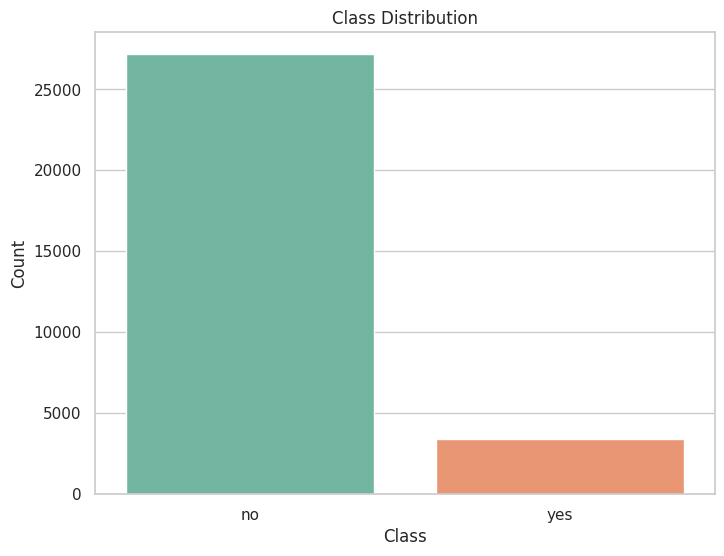

no     27174
yes     3394
Name: y, dtype: int64


In [ ]:
class_distribution = pd.Series(df['y']).value_counts()
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
ax = sns.barplot(x=class_distribution.index, y=class_distribution.values, palette="Set2")
ax.set(xlabel="Class", ylabel="Count")
plt.title("Class Distribution")
plt.show()
print(df['y'].value_counts())

#### show the distribution of customers across different job categories


---



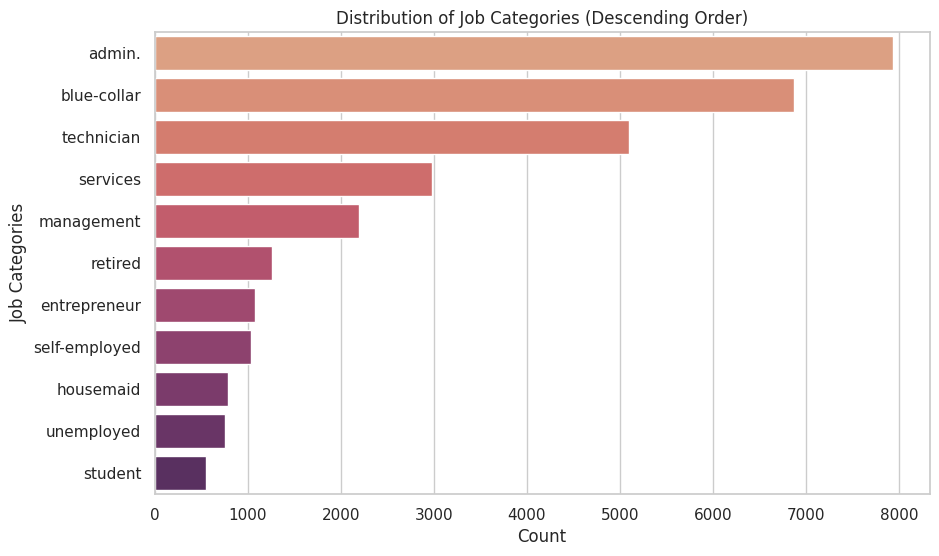

admin.           7931
blue-collar      6870
technician       5097
services         2986
management       2198
retired          1261
entrepreneur     1079
self-employed    1040
housemaid         795
unemployed        759
student           552
Name: job, dtype: int64


In [ ]:
job_counts = df['job'].value_counts()

sns.set(style="whitegrid")
custom_palette = sns.color_palette("flare", len(job_counts))

plt.figure(figsize=(10, 6))
sns.barplot(x=job_counts.values, y=job_counts.index, order=job_counts.index, palette=custom_palette)
plt.xlabel('Count')
plt.ylabel('Job Categories')
plt.title('Distribution of Job Categories (Descending Order)')
plt.show()

print(df['job'].value_counts())

#### Visualize the distribution of customers' marital status


---



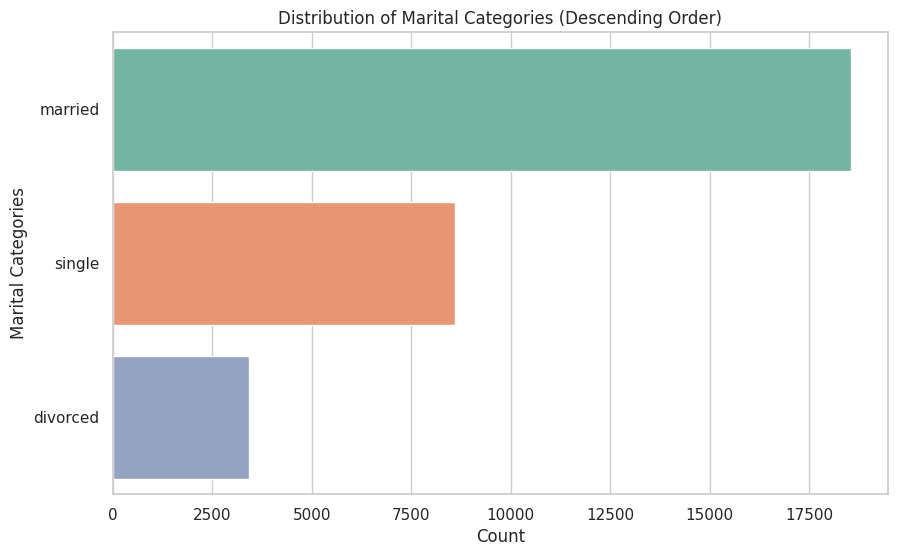

married     18554
single       8597
divorced     3417
Name: marital, dtype: int64


In [ ]:
marital_counts = df['marital'].value_counts()

sns.set(style="whitegrid")
custom_palette = sns.color_palette("Set2", len(marital_counts))

plt.figure(figsize=(10, 6))
sns.barplot(x=marital_counts.values, y=marital_counts.index, order=marital_counts.index, palette=custom_palette)
plt.xlabel('Count')
plt.ylabel('Marital Categories')
plt.title('Distribution of Marital Categories (Descending Order)')
plt.show()

print(df['marital'].value_counts())

#### Show the distribution of customers based on their education levels


---



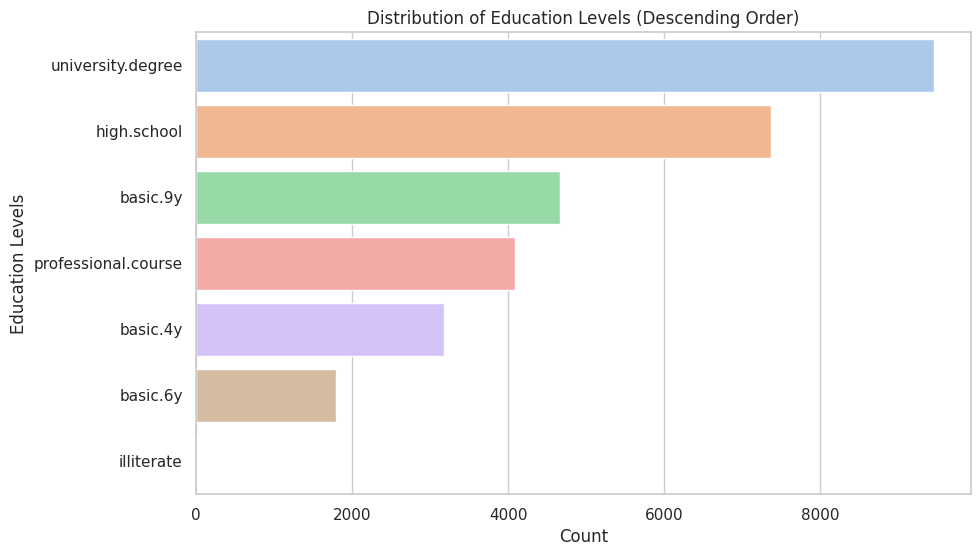

university.degree      9454
high.school            7372
basic.9y               4670
professional.course    4085
basic.4y               3178
basic.6y               1793
illiterate               16
Name: education, dtype: int64


In [ ]:
education_counts = df['education'].value_counts()

sns.set(style="whitegrid")
custom_palette = sns.color_palette("pastel", len(education_counts))

plt.figure(figsize=(10, 6))
sns.barplot(x=education_counts.values, y=education_counts.index, order=education_counts.index, palette=custom_palette)
plt.xlabel('Count')
plt.ylabel('Education Levels')
plt.title('Distribution of Education Levels (Descending Order)')
plt.show()

print(df['education'].value_counts())


#### how many customers have credit in default ('yes' or 'no' or 'other')


---



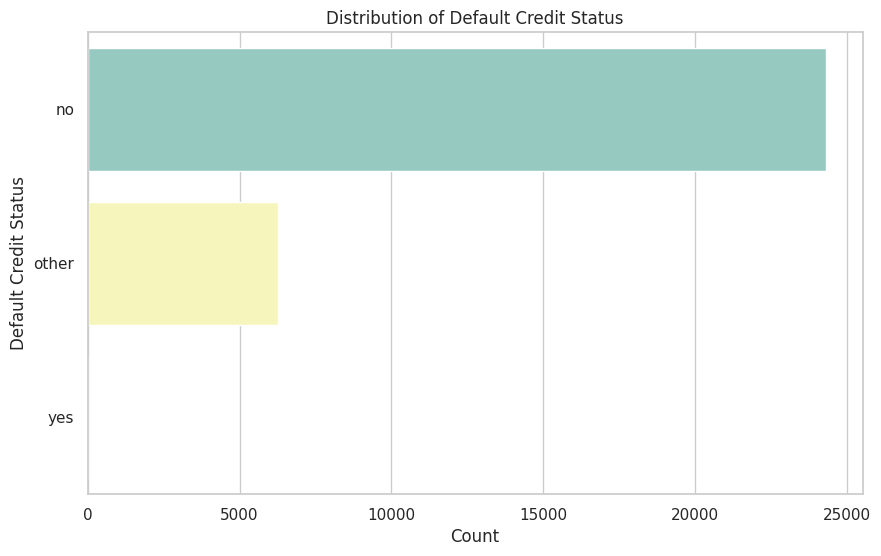

no       24296
other     6269
yes          3
Name: default, dtype: int64


In [ ]:
default_counts = df['default'].value_counts()

sns.set(style="whitegrid")
custom_palette = sns.color_palette("Set3", len(default_counts))

plt.figure(figsize=(10, 6))
sns.barplot(x=default_counts, y=default_counts.index, palette=custom_palette)
plt.xlabel('Count')
plt.ylabel('Default Credit Status')
plt.title('Distribution of Default Credit Status')
plt.show()
print(df['default'].value_counts())

#### Visualize the distribution of customers with or without housing loans


---



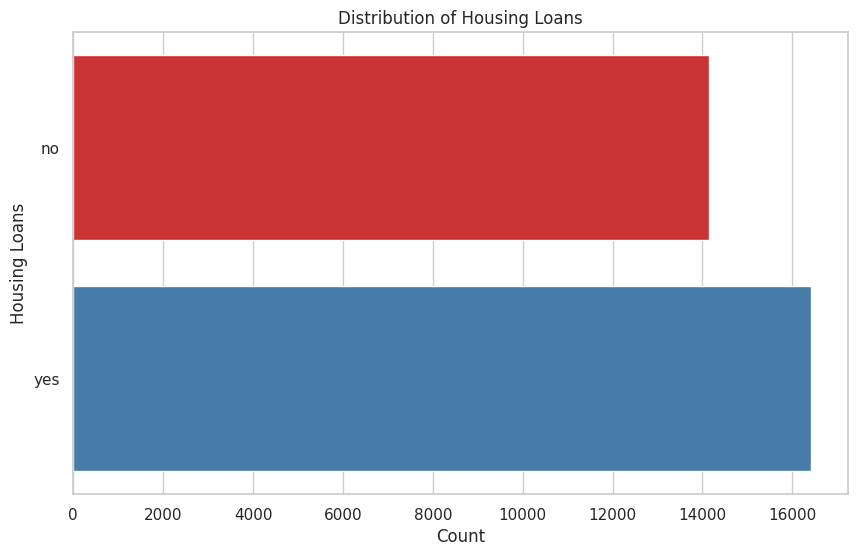

yes    16424
no     14144
Name: housing, dtype: int64


In [ ]:
housing_counts = df['housing'].value_counts()

sns.set(style="whitegrid")
custom_palette = sns.color_palette("Set1", len(housing_counts))

plt.figure(figsize=(10, 6))
sns.barplot(x=housing_counts, y=housing_counts.index, palette=custom_palette)
plt.xlabel('Count')
plt.ylabel('Housing Loans')
plt.title('Distribution of Housing Loans')
plt.show()
print(df['housing'].value_counts())

#### Show the distribution of customers with or without personal loans


---



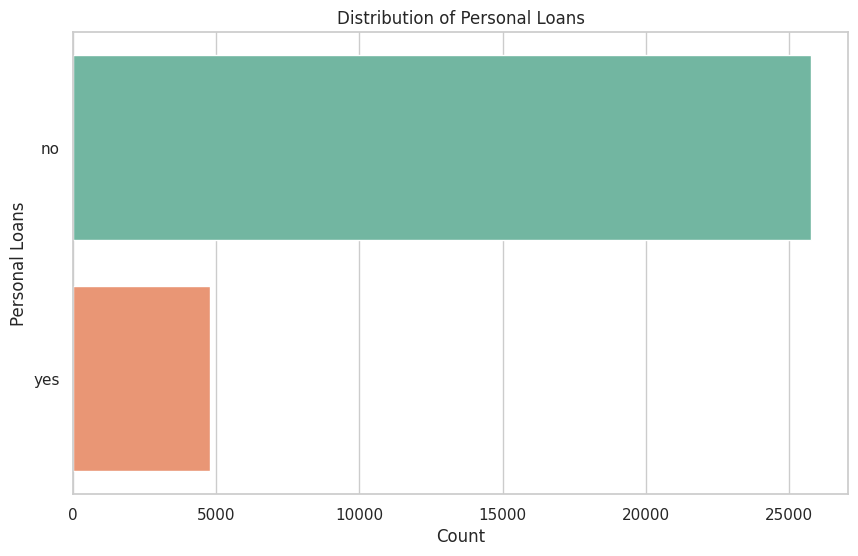

no     25788
yes     4780
Name: loan, dtype: int64


In [ ]:
loan_counts = df['loan'].value_counts()

sns.set(style="whitegrid")
custom_palette = sns.color_palette("Set2", len(loan_counts))

plt.figure(figsize=(10, 6))
sns.barplot(x=loan_counts, y=loan_counts.index, palette=custom_palette)
plt.xlabel('Count')
plt.ylabel('Personal Loans')
plt.title('Distribution of Personal Loans')
plt.show()
print(df['loan'].value_counts())

#### Visualize the distribution of contact communication types used to reach customers.


---



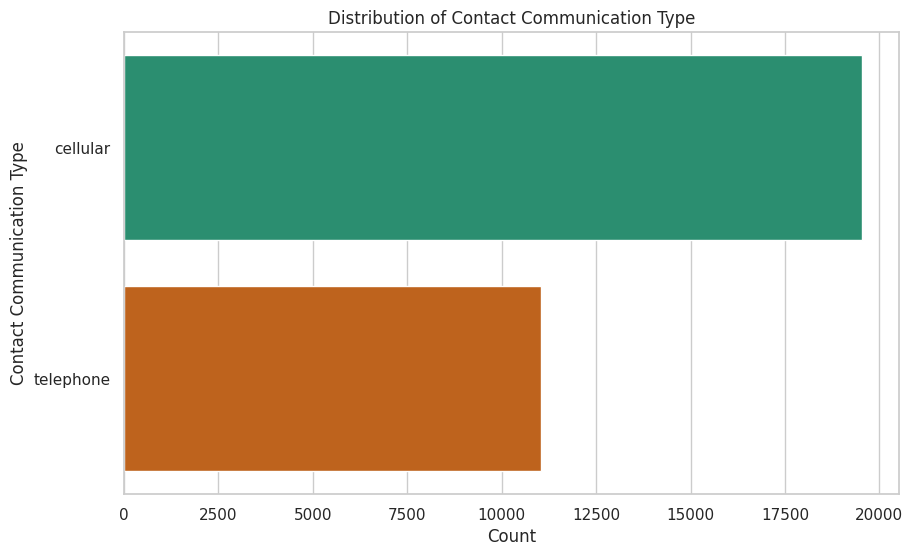

cellular     19539
telephone    11029
Name: contact, dtype: int64


In [ ]:
contact_counts = df['contact'].value_counts()
sns.set(style="whitegrid")

custom_palette = sns.color_palette("Dark2", len(contact_counts))

plt.figure(figsize=(10, 6))
sns.barplot(x=contact_counts, y=contact_counts.index, palette=custom_palette)
plt.xlabel('Count')
plt.ylabel('Contact Communication Type')
plt.title('Distribution of Contact Communication Type')
plt.show()
print(df['contact'].value_counts())

#### Show the distribution of the months when customers were contacted


---



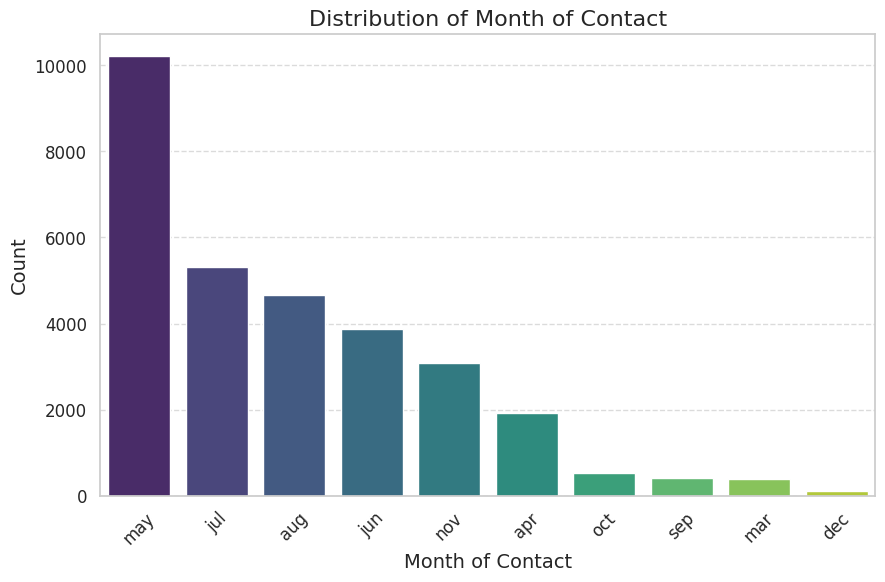

may    10217
jul     5322
aug     4670
jun     3867
nov     3095
apr     1930
oct      538
sep      408
mar      397
dec      124
Name: month, dtype: int64


In [ ]:
month_counts = df['month'].value_counts()

sns.set(style="whitegrid")
custom_palette = sns.color_palette("viridis", len(month_counts))

plt.figure(figsize=(10, 6))
sns.barplot(x=month_counts.index, y=month_counts, order=month_counts.index, palette=custom_palette)
plt.xlabel('Month of Contact', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('Distribution of Month of Contact', fontsize=16)
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

print(df['month'].value_counts())

#### Visualize which days of the week customers were most frequently contacted


---



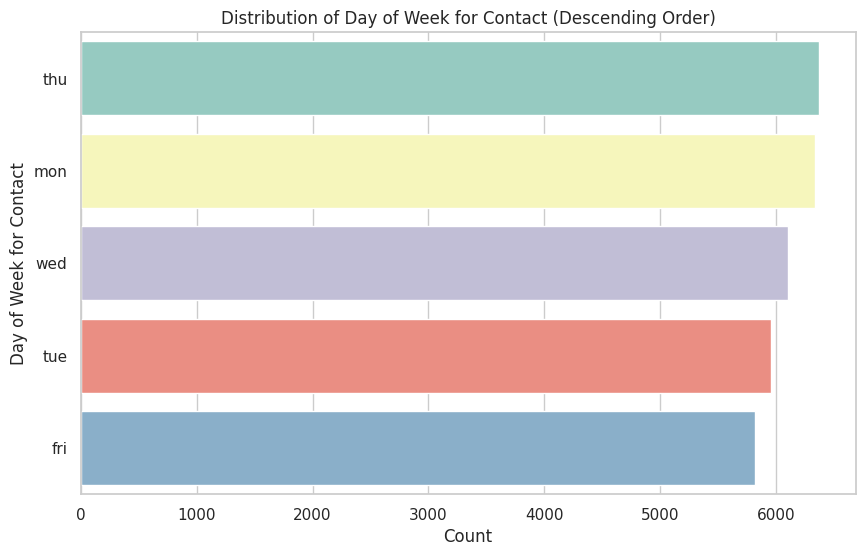

thu    6366
mon    6330
wed    6102
tue    5956
fri    5814
Name: day_of_week, dtype: int64


In [ ]:
day_of_week_counts = df['day_of_week'].value_counts()

sns.set(style="whitegrid")
custom_palette = sns.color_palette("Set3", len(day_of_week_counts))

plt.figure(figsize=(10, 6))
sns.barplot(x=day_of_week_counts.values, y=day_of_week_counts.index, order=day_of_week_counts.index, palette=custom_palette)
plt.xlabel('Count')
plt.ylabel('Day of Week for Contact')
plt.title('Distribution of Day of Week for Contact (Descending Order)')
plt.show()

print(df['day_of_week'].value_counts())


#### Visualize the distribution of the outcome of the previous marketing campaign


---



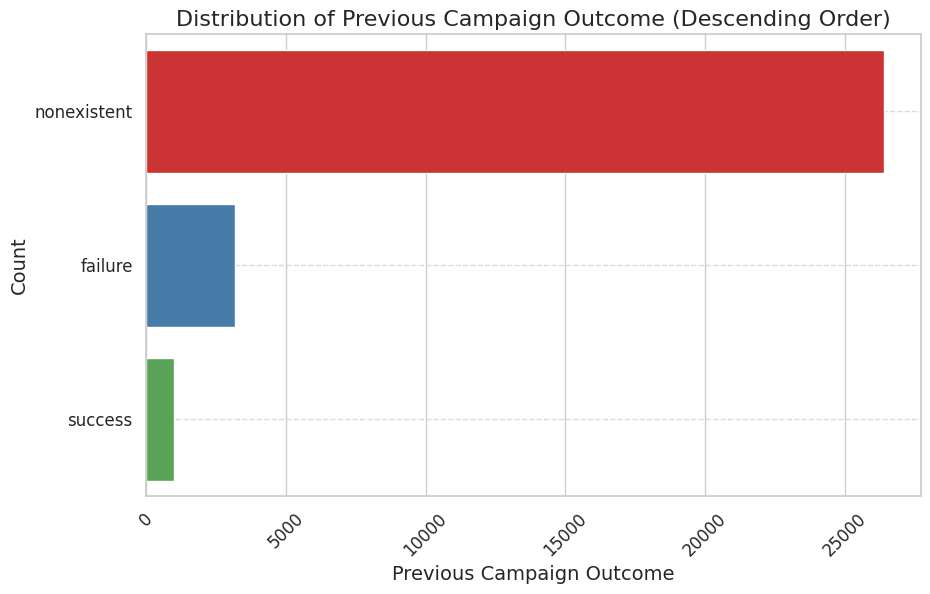

nonexistent    26392
failure         3177
success          999
Name: poutcome, dtype: int64


In [ ]:
previous_outcome_counts = df['poutcome'].value_counts()

sns.set(style="whitegrid")
custom_palette = sns.color_palette("Set1", len(previous_outcome_counts))

plt.figure(figsize=(10, 6))
sns.barplot(x=previous_outcome_counts.values, y=previous_outcome_counts.index, order=previous_outcome_counts.index, palette=custom_palette)
plt.xlabel('Previous Campaign Outcome', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('Distribution of Previous Campaign Outcome (Descending Order)', fontsize=16)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

print(df['poutcome'].value_counts())

####  Insights ✒



*   The top three professions that our customers belong to are - **Administration**, **blue-collar** jobs and **technicians**.

*   A huge number of the customers are **married**.

*   Majority of the customers **do not** have a credit in default

*   Many of our past customers **have applied** for a **housing loan** but **very few have applied** for **personal loans**.

*   **Cell-phones** seem to be the most favoured method of reaching out to customers.

*   Many customers have been contacted in the month of **May**.

*   The plot for the target variable shows **heavy imbalance** in the target variable.

### Bivariate Analysis - Categorical Columns

Checking the relationship between **Target** and **Feature**

#### Job


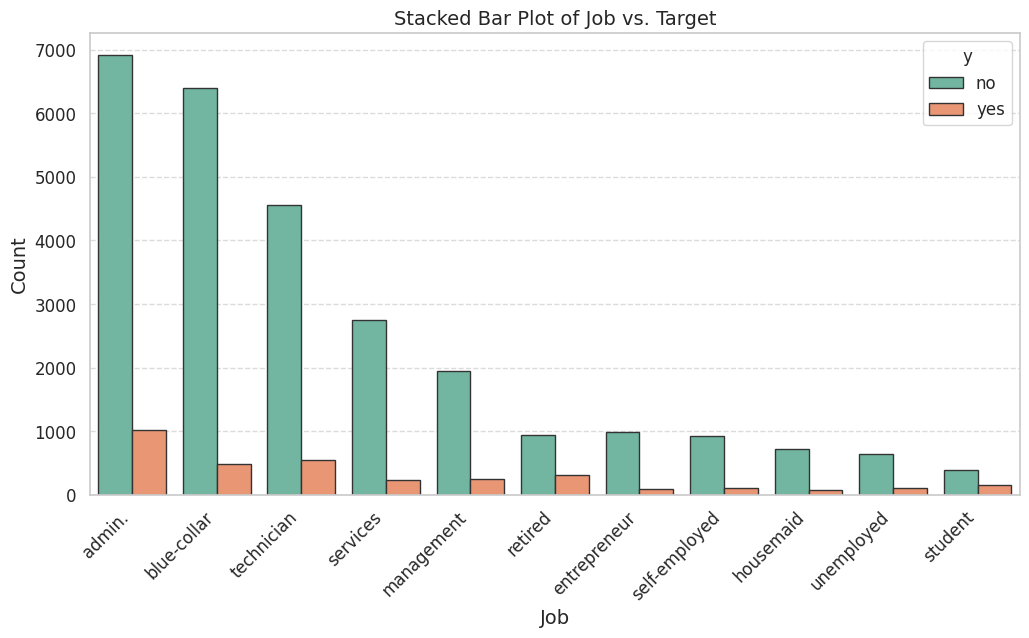

In [ ]:
job_order = df['job'].value_counts().index
custom_palette = sns.color_palette("Set2")

plt.figure(figsize=(12, 6))
sns.countplot(x='job', hue='y', data=df, order=job_order, palette=custom_palette, edgecolor="0.2")

plt.title('Stacked Bar Plot of Job vs. Target', fontsize=14)
plt.xlabel('Job', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='y', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

#### Marital

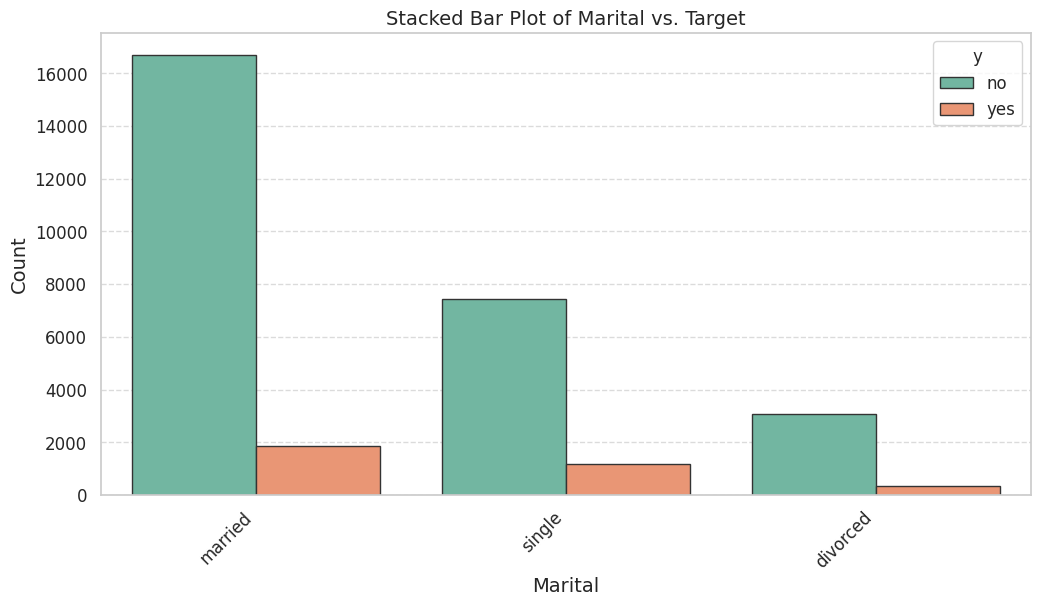

In [ ]:
marital_order = df['marital'].value_counts().index
custom_palette = sns.color_palette("Set2")

plt.figure(figsize=(12, 6))
sns.countplot(x='marital', hue='y', data=df, order=marital_order, palette=custom_palette, edgecolor="0.2")

plt.title('Stacked Bar Plot of Marital vs. Target', fontsize=14)
plt.xlabel('Marital', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='y', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

#### Default ( Credit Card )

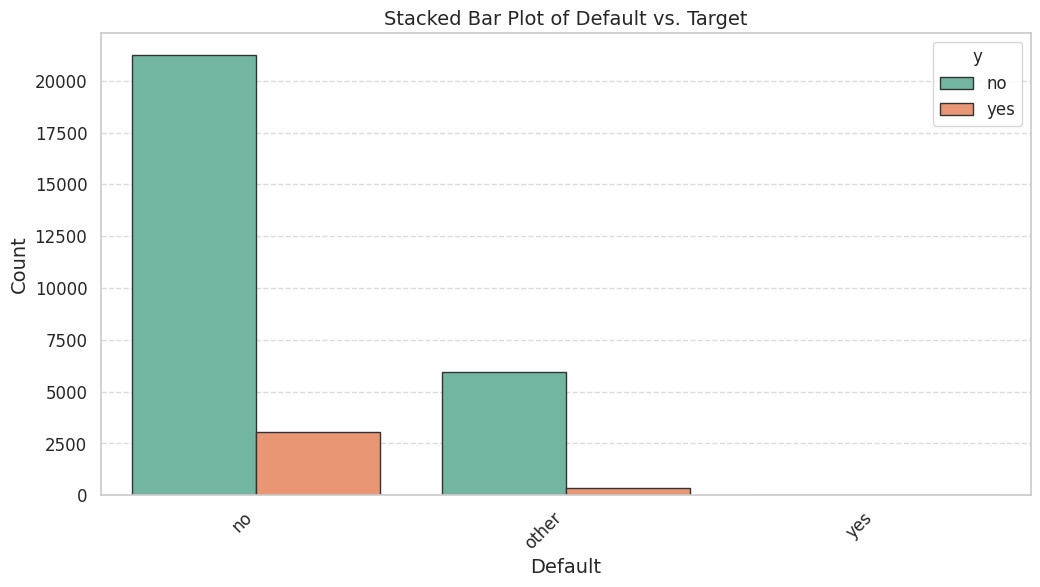

In [ ]:
marital_order = df['default'].value_counts().index
custom_palette = sns.color_palette("Set2")

plt.figure(figsize=(12, 6))
sns.countplot(x='default', hue='y', data=df, order=marital_order, palette=custom_palette, edgecolor="0.2")

plt.title('Stacked Bar Plot of Default vs. Target', fontsize=14)
plt.xlabel('Default', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='y', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

#### Housing loans

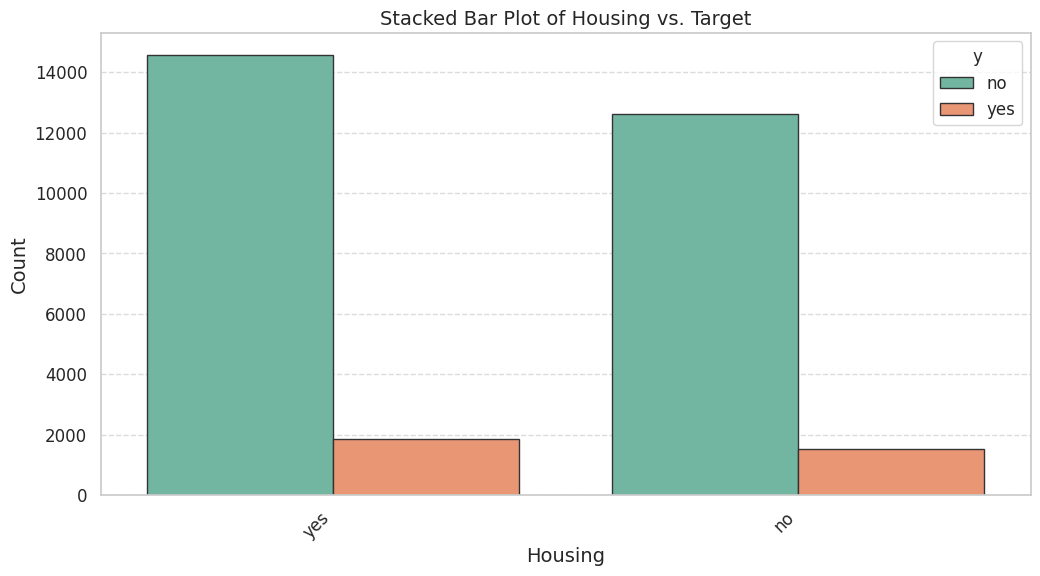

In [ ]:
marital_order = df['housing'].value_counts().index
custom_palette = sns.color_palette("Set2")

plt.figure(figsize=(12, 6))
sns.countplot(x='housing', hue='y', data=df, order=marital_order, palette=custom_palette, edgecolor="0.2")

plt.title('Stacked Bar Plot of Housing vs. Target', fontsize=14)
plt.xlabel('Housing', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='y', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

#### loan

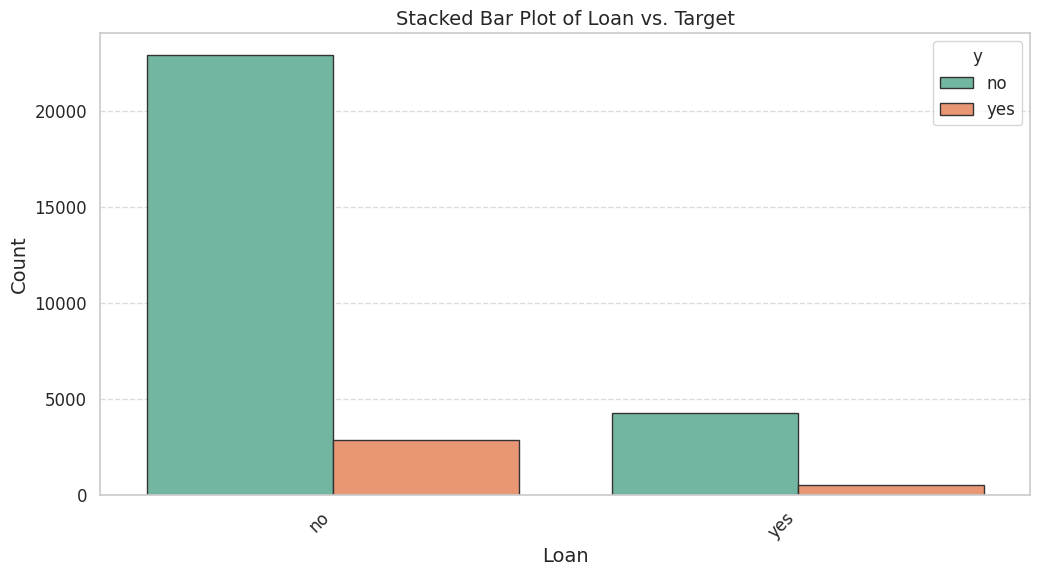

In [ ]:
loan_order = df['loan'].value_counts().index
custom_palette = sns.color_palette("Set2")

plt.figure(figsize=(12, 6))
sns.countplot(x='loan', hue='y', data=df, order=loan_order, palette=custom_palette, edgecolor="0.2")

plt.title('Stacked Bar Plot of Loan vs. Target', fontsize=14)
plt.xlabel('Loan', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='y', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


#### Contact

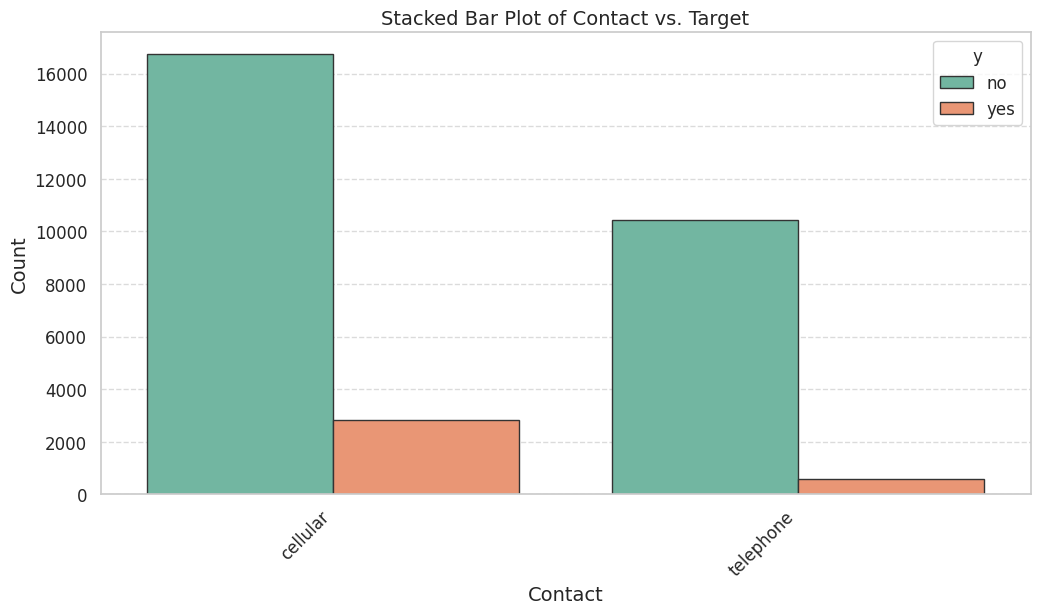

In [ ]:
contact_order = df['contact'].value_counts().index
custom_palette = sns.color_palette("Set2")

plt.figure(figsize=(12, 6))
sns.countplot(x='contact', hue='y', data=df, order=contact_order, palette=custom_palette, edgecolor="0.2")

plt.title('Stacked Bar Plot of Contact vs. Target', fontsize=14)
plt.xlabel('Contact', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='y', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


#### Month

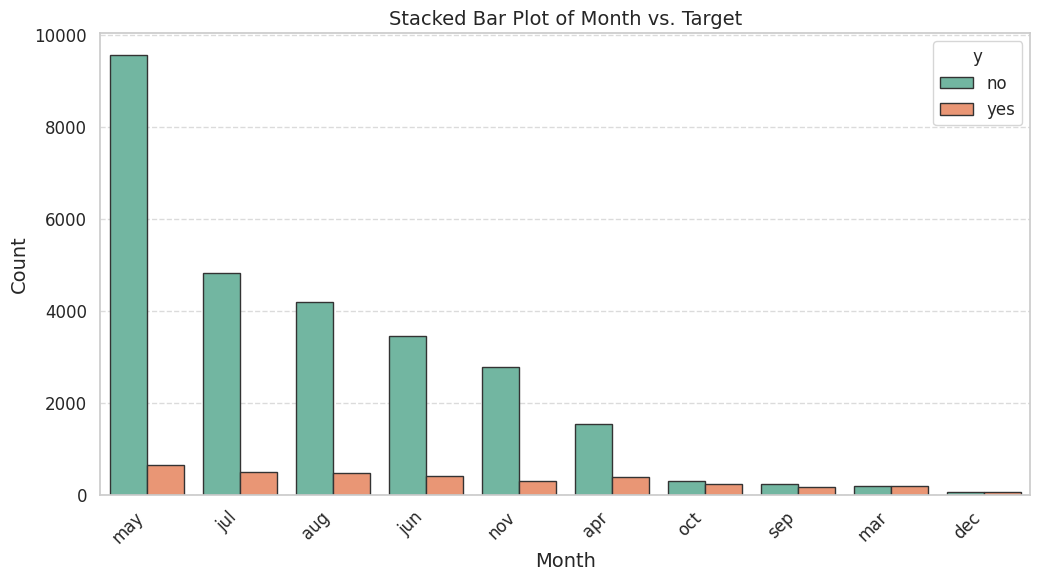

In [ ]:
month_order = df['month'].value_counts().index
custom_palette = sns.color_palette("Set2")

plt.figure(figsize=(12, 6))
sns.countplot(x='month', hue='y', data=df, order=month_order, palette=custom_palette, edgecolor="0.2")

plt.title('Stacked Bar Plot of Month vs. Target', fontsize=14)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='y', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

#### Day of Week

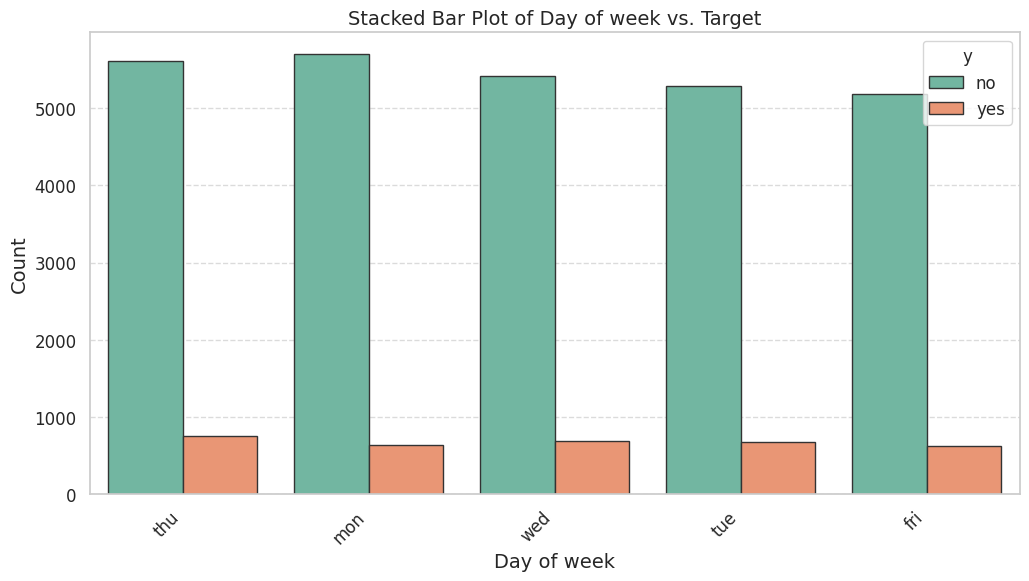

In [ ]:
day_of_week_order = df['day_of_week'].value_counts().index
custom_palette = sns.color_palette("Set2")

plt.figure(figsize=(12, 6))
sns.countplot(x='day_of_week', hue='y', data=df, order=day_of_week_order, palette=custom_palette, edgecolor="0.2")

plt.title('Stacked Bar Plot of Day of week vs. Target', fontsize=14)
plt.xlabel('Day of week', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='y', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

#### Observations ✍

The common traits seen for customers who have subscribed for the term deposit are :


*   Customers having **administrative** jobs form the majority amongst those who have subscirbed to the term deposit with **technicians** being the second majority.

*   They are **married**

*   They hold a **university degree**

*   They **do not** hold a **credit** in default

*   **Housing loan** doesn't seem a priority to check for since an equal number of customers who have and have not subscribed to it seem to have subscribed to the term deposit.

*   **Cell-phones** should be the **preferred mode** of contact for contacting customers.



### Continuous columns

#### Visualize the **distribution** of customer ages to understand the age demographics of the dataset


---



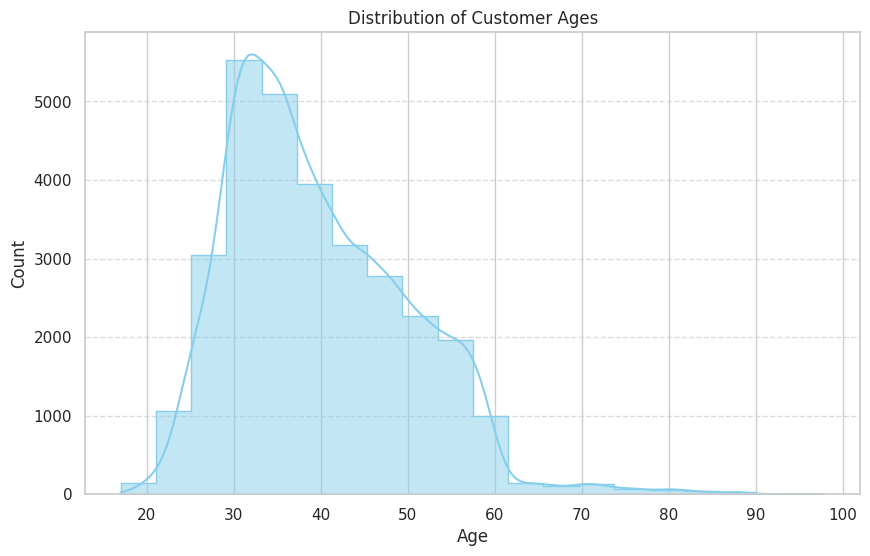

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='age', bins=20, kde=True, color='skyblue', element='step', common_norm=False)

plt.title('Distribution of Customer Ages')
plt.xlabel('Age')
plt.ylabel('Count')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

#### The **distribution** and **mean** duration of call durations

---



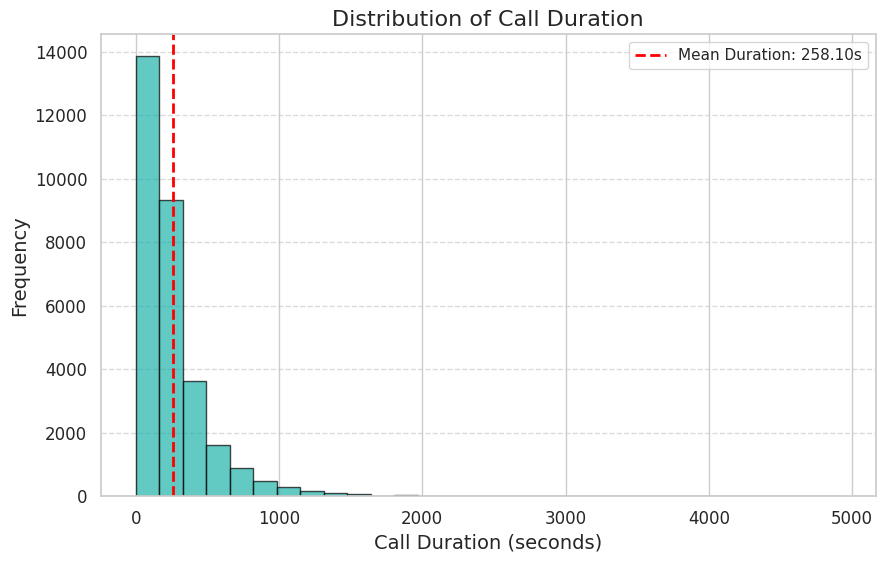

In [ ]:
call_duration = df['duration']

plt.figure(figsize=(10, 6))
plt.hist(call_duration, bins=30, color='lightseagreen', edgecolor='black', alpha=0.7)
plt.xlabel('Call Duration (seconds)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.title('Distribution of Call Duration', fontsize=16)
plt.grid(axis='y', linestyle='--', alpha=0.7)

mean_duration = call_duration.mean()
plt.axvline(mean_duration, color='red', linestyle='dashed', linewidth=2, label=f'Mean Duration: {mean_duration:.2f}s')
plt.legend()

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

#### Comparing **average** duration for 'yes' and 'no'

---



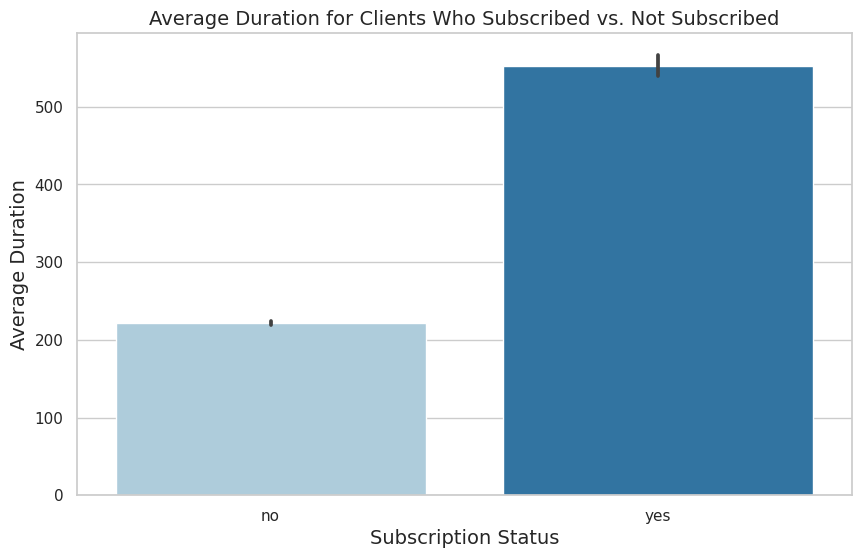

In [ ]:
custom_palette = sns.color_palette("Paired")
plt.figure(figsize=(10, 6))
sns.barplot(x='y', y='duration', data=df, palette=custom_palette)

plt.title('Average Duration for Clients Who Subscribed vs. Not Subscribed', fontsize=14)
plt.xlabel('Subscription Status', fontsize=14)
plt.ylabel('Average Duration', fontsize=14)
plt.show()

#### Observations ▶



*   The age distribution of clients reveals a predominant age group between **30 and 40**, with a gradual decline beyond this range.

*   It can be noted that the **longest repetition duration** is approximately **100** seconds, and the **average** is **258** seconds.


*   Customers who **subscribed** tended to have **longer calls**, averaging around **500** seconds






### Pairplot

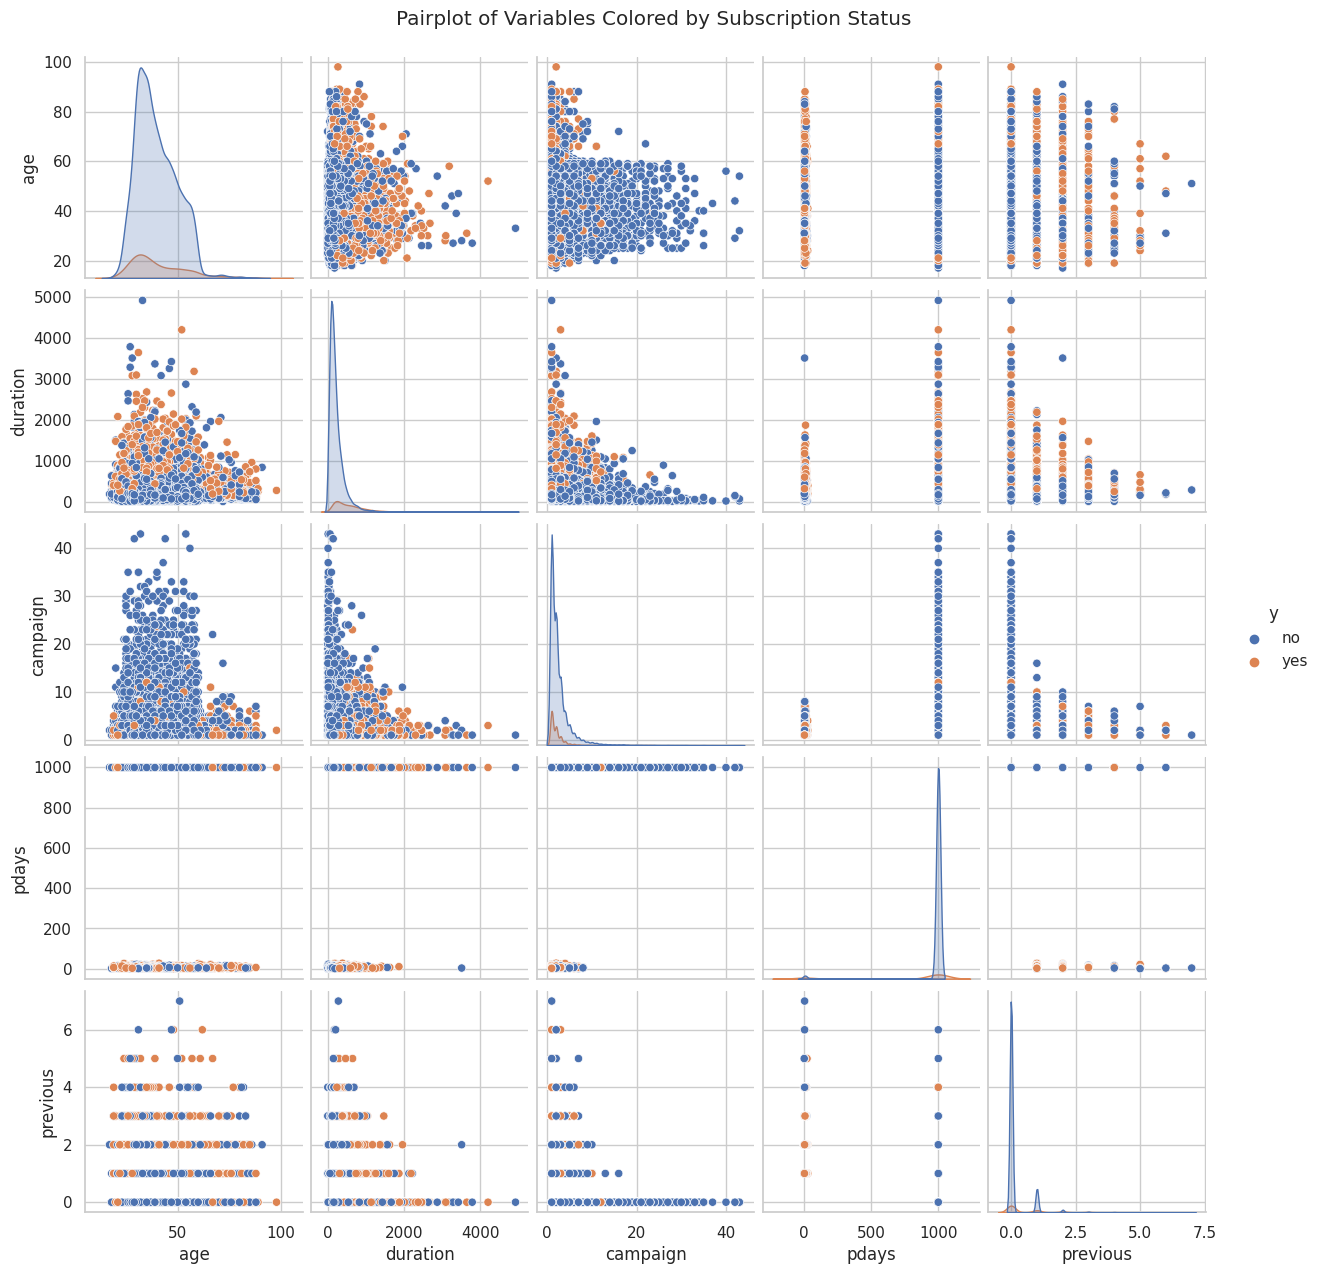

In [ ]:
pairplot = sns.pairplot(df, hue='y')
pairplot.fig.suptitle('Pairplot of Variables Colored by Subscription Status', y=1.02)
plt.show()



*   it appears that the variables do not exhibit a linear correlation.

*   We can unveil associations and patterns among various variables

*   We can observe the data dispersion across all variables




# Correlation Analysis

In [ ]:
df_copy = df.copy()
label_encoder = LabelEncoder()

categorical_columns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome', 'y']

for column in categorical_columns:
    df_copy[column] = label_encoder.fit_transform(df_copy[column])

In [ ]:
correlation_matrix = df_copy.corr()

In [ ]:
correlation_matrix.iloc[:,-1].sort_values(ascending=False)

y              1.000000
duration       0.401092
previous       0.221180
poutcome       0.129148
education      0.056182
marital        0.044313
age            0.027932
job            0.020970
day_of_week    0.010601
housing        0.007607
loan          -0.001069
month         -0.003142
campaign      -0.063998
default       -0.095515
contact       -0.139542
pdays         -0.320008
Name: y, dtype: float64

Correlation Visualization

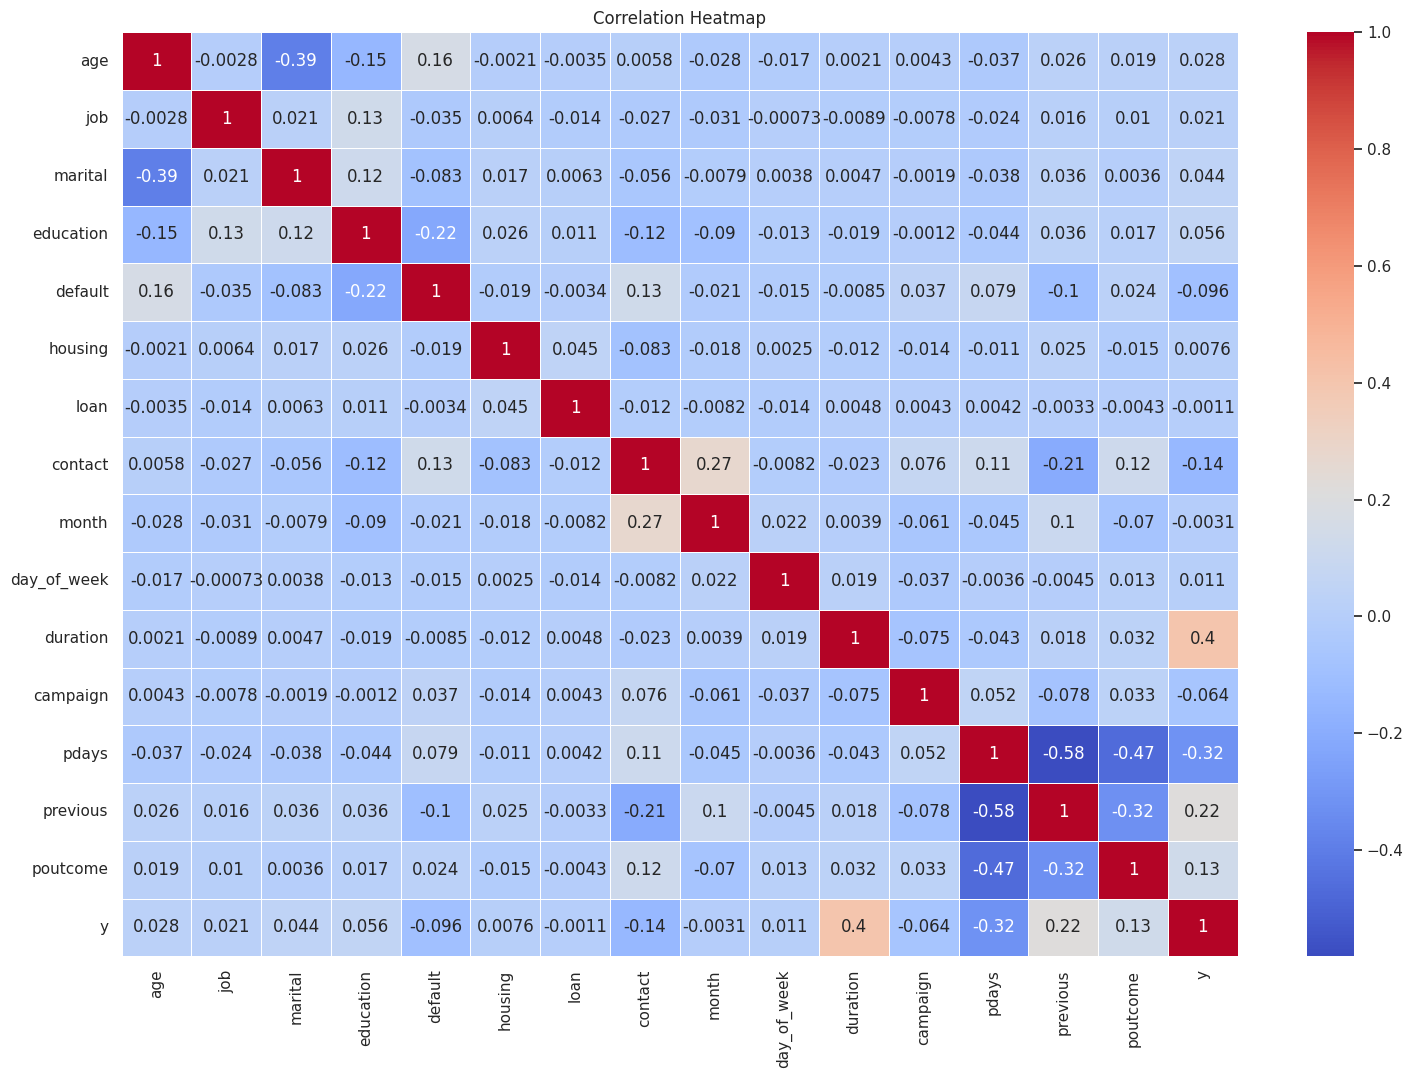

In [ ]:
plt.figure(figsize=(18, 12))
sns.heatmap(correlation_matrix, cmap='coolwarm', linewidths=0.5 , annot=True)
plt.title('Correlation Heatmap')
plt.show()

# Feature Engineering

## Encoding

In [ ]:
df = pd.get_dummies(df, columns=['job', 'marital', 'education', 'default', 'housing', 'loan',
                                         'contact', 'month', 'day_of_week', 'poutcome'])

In [ ]:
df = pd.concat([df.drop('y', axis=1), df['y'].map({'no': 0, 'yes': 1})], axis=1)

In [ ]:
df.head()

,age,duration,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,...,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success,y
0,49,227,4,999,0,0,1,0,0,0,...,0,0,0,0,0,1,0,1,0,0
1,37,202,2,999,1,0,0,1,0,0,...,0,0,0,0,0,1,1,0,0,0
2,78,1148,1,999,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,1
3,36,120,2,999,0,1,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
4,59,368,2,999,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0


## Handling Balance data

Check Balance

In [ ]:
df['y'].value_counts()

0    27174
1     3394
Name: y, dtype: int64

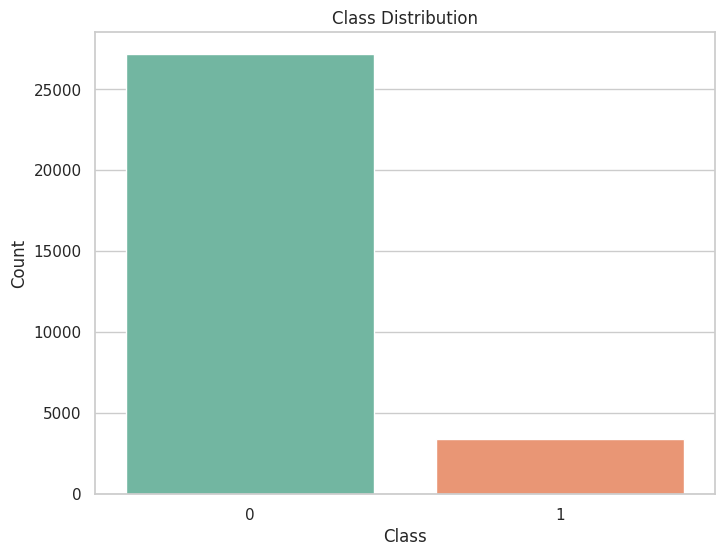

In [ ]:
class_distribution = pd.Series(df['y']).value_counts()
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
ax = sns.barplot(x=class_distribution.index, y=class_distribution.values, palette="Set2")
ax.set(xlabel="Class", ylabel="Count")
plt.title("Class Distribution")
plt.show()

Handling

In [ ]:
x = df.drop('y', axis=1).values
y = df['y'].values

In [ ]:
print("Distribution before balancing:", Counter(y))

random_over_sampler = RandomOverSampler(sampling_strategy=0.5, random_state=42)
X_resampled, y_resampled = random_over_sampler.fit_resample(x, y)
print("Distribution after Random Oversampling:", Counter(y_resampled))

random_under_sampler = RandomUnderSampler(sampling_strategy=1.0, random_state=42)
X_resampled, y_resampled = random_under_sampler.fit_resample(X_resampled, y_resampled)
print("Distribution after Random Undersampling:", Counter(y_resampled))

Distribution before balancing: Counter({0: 27174, 1: 3394})
Distribution after Random Oversampling: Counter({0: 27174, 1: 13587})
Distribution after Random Undersampling: Counter({0: 13587, 1: 13587})


## Split the data

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, stratify=y_resampled, random_state=42)

## Scale Features

StandardScaler

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

RobustScaler

In [ ]:
scaler_Robust = RobustScaler()
X_train_scaled_Robust = scaler.fit_transform(X_train)
X_test_scaled_Robust = scaler.transform(X_test)

## Curse of Dimensionality ☠

### Chi - Square

GridSearch for **K**

In [ ]:
pipeline = Pipeline([
    ('chi2', SelectKBest(chi2)),
    ('classifier', RandomForestClassifier())
])


param_grid = {
    'chi2__k': list(range(1,34))
}


grid_search = GridSearchCV(pipeline, param_grid=param_grid, cv=5 , scoring="f1")
grid_search.fit(X_train, y_train)


print("Best number of features (k):", grid_search.best_params_['chi2__k'])
print("Best cross-validation score:", grid_search.best_score_)

Best number of features (k): 32
Best cross-validation score: 0.9342240293431106


In [ ]:
ch=SelectKBest(chi2,k=33)
ch.fit(X_train ,y_train)

SelectKBest(k=33, score_func=<function chi2 at 0x7d3377996f80>)

In [ ]:
X_train_selected=ch.transform(X_train)
X_test_selected=ch.transform(X_test)

In [ ]:
mask = ch.get_support()
selected_feature_names = pd.DataFrame(X_train).columns[mask]
df.drop('y',axis=1).columns[list(selected_feature_names)]

Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'job_admin.',
       'job_blue-collar', 'job_entrepreneur', 'job_retired', 'job_services',
       'job_student', 'marital_married', 'marital_single',
       'education_basic.6y', 'education_basic.9y',
       'education_university.degree', 'default_no', 'default_other',
       'contact_cellular', 'contact_telephone', 'month_apr', 'month_dec',
       'month_jul', 'month_mar', 'month_may', 'month_nov', 'month_oct',
       'month_sep', 'day_of_week_mon', 'day_of_week_thu', 'poutcome_failure',
       'poutcome_nonexistent', 'poutcome_success'],
      dtype='object')

### PCA

In [ ]:
scaler = StandardScaler()
X_train_scaled_for_pca = scaler.fit_transform(X_train_selected)
X_test_scaled_for_pca = scaler.transform(X_test_selected)

GridSearch for **components**

In [ ]:
pca = PCA()

pipeline = Pipeline([
    ('pca', pca),
    ('classifier', RandomForestClassifier())
])

param_grid = {
    'pca__n_components': range(1, 21)
}


In [ ]:
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='f1')

grid_search.fit(X_train_scaled_for_pca, y_train)

print("Best Number of Components:", grid_search.best_params_['pca__n_components'])

Best Number of Components: 18


In [ ]:
pca = PCA(n_components=20)
pca.fit(X_train_scaled_for_pca ,y_train)

PCA(n_components=20)

In [ ]:
X_train_pca = pca.fit_transform(X_train_scaled_for_pca)
X_test_pca = pca.transform(X_test_scaled_for_pca)

In [ ]:
pca.explained_variance_ratio_
print("Explained Variance Ratio:", pca.explained_variance_ratio_)

Explained Variance Ratio: [0.12337523 0.0806722  0.0647442  0.05632301 0.05063039 0.0454336
 0.04026437 0.03917092 0.03611988 0.03438207 0.03319188 0.03271126
 0.0318512  0.03161741 0.03063936 0.03026662 0.02995732 0.02975039
 0.02715057 0.02554212]


In [ ]:
for i, ratio in enumerate(pca.explained_variance_ratio_):
    print(f"Principal Component (PC{i + 1}): {ratio * 100:.2f}% of the total variance is explained by PC{i + 1}.")

Principal Component (PC1): 12.34% of the total variance is explained by PC1.
Principal Component (PC2): 8.07% of the total variance is explained by PC2.
Principal Component (PC3): 6.47% of the total variance is explained by PC3.
Principal Component (PC4): 5.63% of the total variance is explained by PC4.
Principal Component (PC5): 5.06% of the total variance is explained by PC5.
Principal Component (PC6): 4.54% of the total variance is explained by PC6.
Principal Component (PC7): 4.03% of the total variance is explained by PC7.
Principal Component (PC8): 3.92% of the total variance is explained by PC8.
Principal Component (PC9): 3.61% of the total variance is explained by PC9.
Principal Component (PC10): 3.44% of the total variance is explained by PC10.
Principal Component (PC11): 3.32% of the total variance is explained by PC11.
Principal Component (PC12): 3.27% of the total variance is explained by PC12.
Principal Component (PC13): 3.19% of the total variance is explained by PC13.
Pri

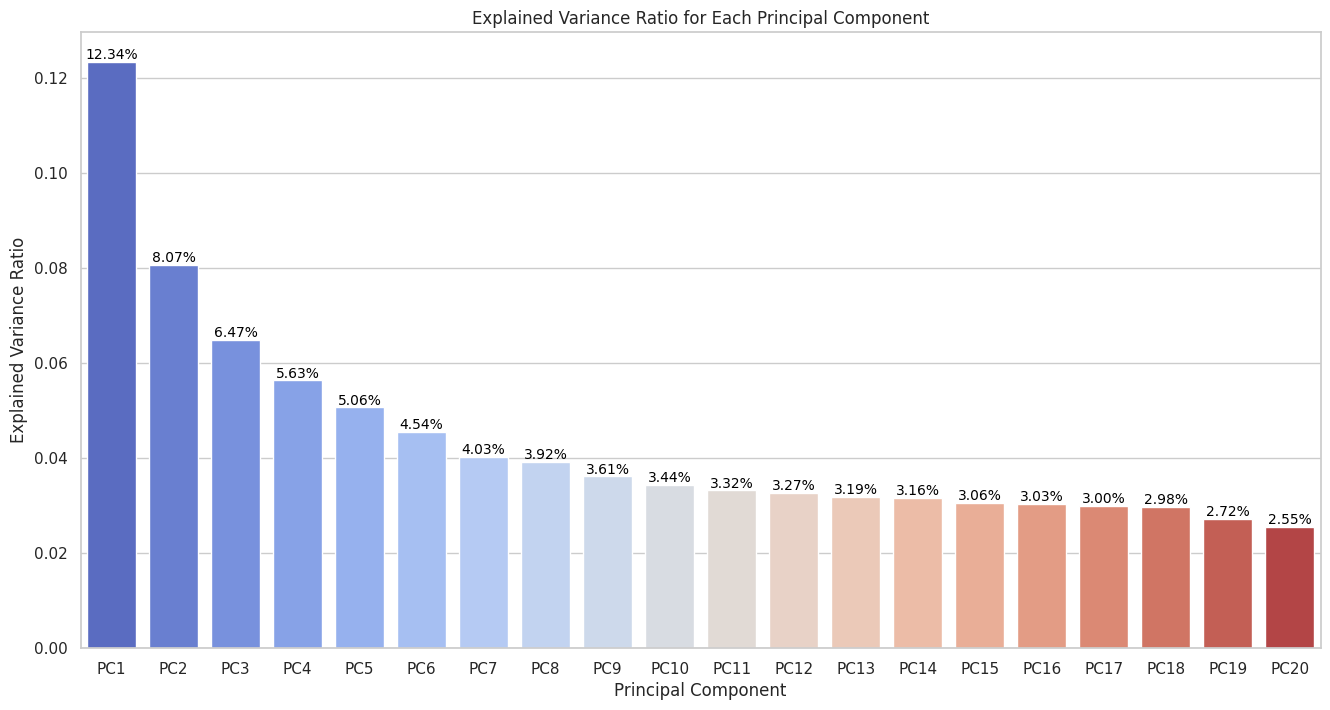

In [ ]:
df_var_ratios = pd.DataFrame({'Principal Component': [f'PC{i+1}' for i in range(len(pca.explained_variance_ratio_))],
                              'Explained Variance Ratio': pca.explained_variance_ratio_})
plt.figure(figsize=(16, 8))
ax = sns.barplot(x='Principal Component', y='Explained Variance Ratio', data=df_var_ratios, palette='coolwarm')


for i, ratio in enumerate(pca.explained_variance_ratio_):
    ax.text(i, ratio, f'{ratio*100:.2f}%', ha='center', va='bottom', fontsize=10, color='black')

plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio for Each Principal Component')
plt.show()

# Prepared Model

## Grid Search

In [ ]:
def grid_search(x_train, y_train, model_type, scoring_metric='accuracy'):
    start_time = time.time()

    if model_type == 'svm':
        param_grid = {'C': [0.1, 1, 10],
                      'kernel': ['linear', 'poly', 'rbf'],
                      'gamma': ['auto', 'scale']}
        model = SVC(random_state=42)

    elif model_type == 'knn':
        param_grid = {'n_neighbors': list(range(3, 14)),
                      'p': [1, 2],
                      'weights': ['uniform', 'distance']}
        model = KNeighborsClassifier()

    elif model_type == 'dtree':
        param_grid = {'criterion': ['gini', 'entropy'],
                      'splitter': ['best', 'random'],
                      'min_samples_split': [2, 5, 10],
                      'min_samples_leaf': [1, 2, 4],
                      'max_features': [None, 'sqrt', 'log2'],
                      'random_state': [42],
                      'max_depth': [None, 10, 20, 30]}
        model = DecisionTreeClassifier(random_state=42)

    elif model_type == 'logistic':
        param_grid = {'C': [0.1, 1, 10],
                      'penalty': ['l1', 'l2'],
                      'solver': ['liblinear', 'saga'],
                      'max_iter': [100, 200, 300, 1000],
                      'multi_class': ['auto', 'ovr'],
                      'class_weight': [None, 'balanced']}
        model = LogisticRegression(random_state=42)

    elif model_type == 'random_forest':
        param_grid = {'n_estimators': [50, 100, 200],
                      'min_samples_split': [2, 5, 10],
                      'min_samples_leaf': [1, 2, 4],
                      'bootstrap': [True, False],
                      'max_depth': [None, 10, 20, 30]}
        model = RandomForestClassifier(random_state=42)
    else:
        raise ValueError("Invalid model_type. Supported values: 'svm', 'knn', 'dtree', 'logistic', 'random_forest'")

    grid_search = GridSearchCV(model, param_grid, scoring=scoring_metric, cv=5)
    grid_search.fit(x_train, y_train)

    print("Best hyperparameters: ", grid_search.best_params_)
    print("Best score: ", grid_search.best_score_)

    end_time = time.time()
    elapsed_time = end_time - start_time
    print(f"Elapsed Time: {elapsed_time:.2f} seconds")


## Random Search

In [ ]:
def random_search(x_train, y_train, model_type, scoring_metric='accuracy', n_iter=10, random_state=42):
    start_time = time.time()

    if model_type == 'svm':
        param_dist = {'C': [0.1, 1, 10],
                      'kernel': ['linear', 'poly', 'rbf'],
                      'gamma': ['auto', 'scale']}
        model = SVC(random_state=random_state)

    elif model_type == 'knn':
        param_dist = {'n_neighbors': list(range(3, 14)),
                      'p': [1, 2],
                      'weights': ['uniform', 'distance']}
        model = KNeighborsClassifier()

    elif model_type == 'dtree':
        param_dist = {'criterion': ['gini', 'entropy'],
                      'splitter': ['best', 'random'],
                      'min_samples_split': [2, 5, 10],
                      'min_samples_leaf': [1, 2, 4],
                      'max_features': [None, 'sqrt', 'log2'],
                      'random_state': [random_state],
                      'max_depth': [None, 10, 20, 30]}
        model = DecisionTreeClassifier(random_state=random_state)

    elif model_type == 'logistic':
        param_dist = {'C': [0.1, 1, 10],
                      'penalty': ['l1', 'l2'],
                      'solver': ['liblinear', 'saga'],
                      'max_iter': [100, 200, 300, 1000],
                      'multi_class': ['auto', 'ovr'],
                      'class_weight': [None, 'balanced']}
        model = LogisticRegression(random_state=random_state)

    elif model_type == 'random_forest':
        param_dist = {'n_estimators': [50, 100, 200],
                      'min_samples_split': [2, 5, 10],
                      'min_samples_leaf': [1, 2, 4],
                      'bootstrap': [True, False],
                      'max_depth': [None, 10, 20, 30]}
        model = RandomForestClassifier(random_state=random_state)
    else:
        raise ValueError("Invalid model_type. Supported values: 'svm', 'knn', 'dtree', 'logistic', 'random_forest'")

    random_search = RandomizedSearchCV(model, param_dist, n_iter=n_iter, scoring=scoring_metric, cv=5, random_state=random_state)
    random_search.fit(x_train, y_train)

    print("Best hyperparameters: ", random_search.best_params_)
    print("Best score: ", random_search.best_score_)

    end_time = time.time()
    elapsed_time = end_time - start_time
    print(f"Elapsed Time: {elapsed_time:.2f} seconds")

## Models

In [ ]:
def build_model(x_train, y_train, x_test, y_test, model_type, **kwargs):
    if model_type == 'svm':
        model = SVC(probability=True, **kwargs)
    elif model_type == 'knn':
        model = KNeighborsClassifier(**kwargs)
    elif model_type == 'dtree':
        model = DecisionTreeClassifier(**kwargs)
    elif model_type == 'logistic':
        model = LogisticRegression(**kwargs)
    elif model_type == 'random_forest':
        model = RandomForestClassifier(**kwargs)
    else:
        raise ValueError("Invalid model type. Supported values: 'svm', 'knn', 'dtree', 'logistic', 'random_forest'")

    start_time = time.time()
    model.fit(x_train, y_train)
    end_time = time.time()
    elapsed_time = end_time - start_time

    y_pred = model.predict(x_test)
    y_prob = model.predict_proba(x_test)[:, 1]

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_prob)
    conf_matrix = confusion_matrix(y_test, y_pred)


    fpr, tpr, thresholds = roc_curve(y_test, y_prob)

    print(f"Training time: {elapsed_time:.2f} seconds")
    print(41*'_')
    print(f'The Accuracy: {accuracy:.2f}%')
    print(f'The Recall: {recall:.2f}%')
    print(f'The Precision: {precision:.2f}%')
    print(f'The F1 Score: {f1:.2f}%')
    print(f'The ROC-AUC Score: {roc_auc:.2f}%')
    print('Confusion Matrix:')
    print(conf_matrix)


    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc='lower right')


    plt.subplot(1, 2, 2)
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 16})
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title('Confusion Matrix')

    plt.tight_layout()
    plt.show()

# Applying Models

## Logistic Regression

In [ ]:
grid_search(X_train_pca, y_train, model_type='logistic', scoring_metric='f1')

Best hyperparameters:  {'C': 0.1, 'class_weight': None, 'max_iter': 100, 'multi_class': 'auto', 'penalty': 'l2', 'solver': 'saga'}
Best score:  0.8180426608025918
Elapsed Time: 117.51 seconds


Training time: 0.15 seconds
_________________________________________
The Accuracy: 0.83%
The Recall: 0.80%
The Precision: 0.85%
The F1 Score: 0.82%
The ROC-AUC Score: 0.90%
Confusion Matrix:
[[3487  590]
 [ 825 3251]]


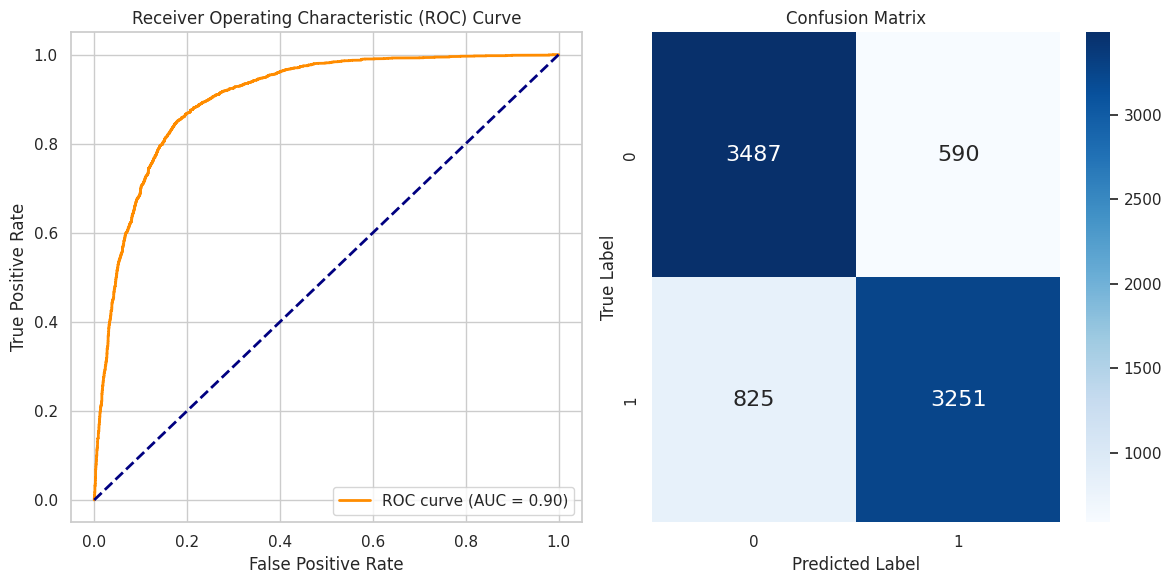

In [ ]:
build_model(X_train_pca, y_train, X_test_pca, y_test, model_type='logistic' , C = 1, class_weight= None, max_iter = 100, multi_class='auto', penalty= "l1", solver= 'saga')

## DecisionTree Classifier

In [ ]:
grid_search(X_train_pca, y_train, model_type='dtree', scoring_metric='f1')

Best hyperparameters:  {'criterion': 'gini', 'max_depth': 30, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'random_state': 42, 'splitter': 'best'}
Best score:  0.9113018249553575
Elapsed Time: 301.44 seconds


Training time: 0.67 seconds
_________________________________________
The Accuracy: 0.93%
The Recall: 0.98%
The Precision: 0.89%
The F1 Score: 0.93%
The ROC-AUC Score: 0.93%
Confusion Matrix:
[[3596  481]
 [  99 3977]]


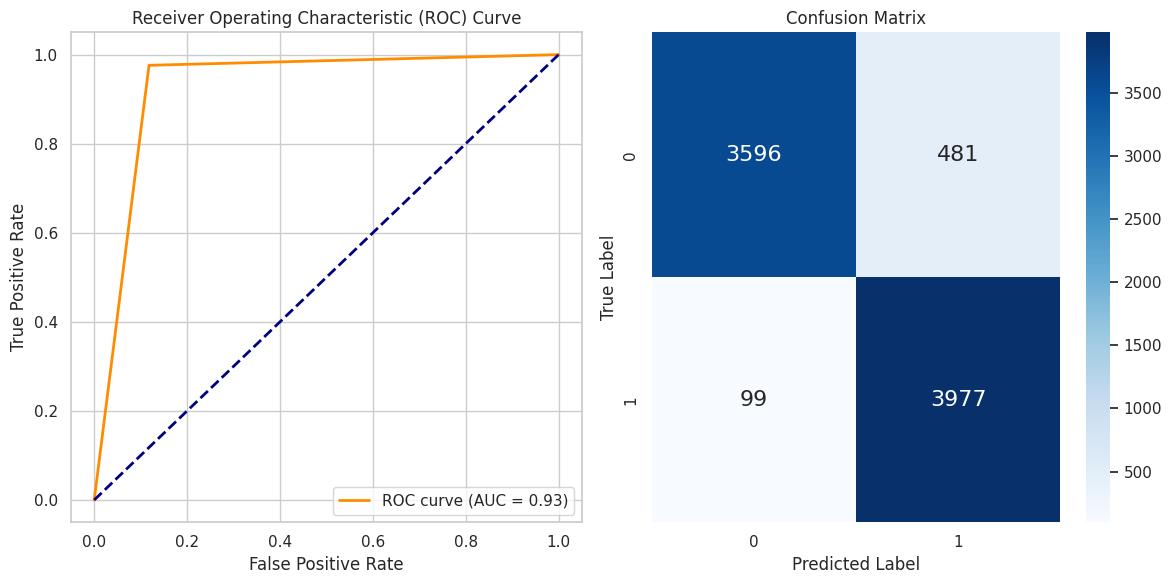

In [ ]:
build_model(X_train_pca, y_train, X_test_pca, y_test, model_type='dtree' , criterion = 'entropy', max_depth = 30, max_features = None, min_samples_leaf = 1, min_samples_split=2, random_state= 42, splitter= 'best')

## Random Forest

In [ ]:
random_search(X_train_pca, y_train, model_type='random_forest', scoring_metric='f1')

Best hyperparameters:  {'n_estimators': 50, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': None, 'bootstrap': False}
Best score:  0.9354281736109495
Elapsed Time: 386.43 seconds


Training time: 6.67 seconds
_________________________________________
The Accuracy: 0.95%
The Recall: 0.98%
The Precision: 0.92%
The F1 Score: 0.95%
The ROC-AUC Score: 0.99%
Confusion Matrix:
[[3724  353]
 [  81 3995]]


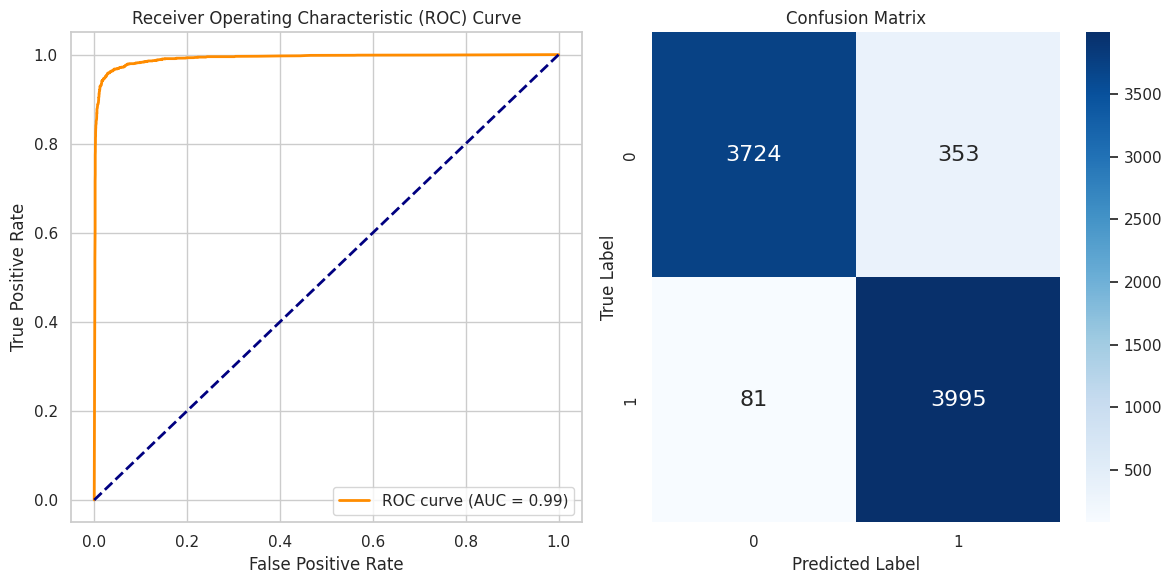

In [ ]:
build_model(X_train_pca, y_train, X_test_pca, y_test, model_type='random_forest', n_estimators= 50, min_samples_split= 5, min_samples_leaf= 1, max_depth= None, bootstrap= False)

## k-Nearest Neighbors (KNN)

In [ ]:
grid_search(X_train_pca, y_train, model_type='knn', scoring_metric='f1')

Best hyperparameters:  {'n_neighbors': 12, 'p': 1, 'weights': 'distance'}
Best score:  0.9086313888391709
Elapsed Time: 284.45 seconds


Training time: 0.00 seconds
_________________________________________
The Accuracy: 0.91%
The Recall: 0.98%
The Precision: 0.86%
The F1 Score: 0.92%
The ROC-AUC Score: 0.96%
Confusion Matrix:
[[3423  654]
 [  69 4007]]


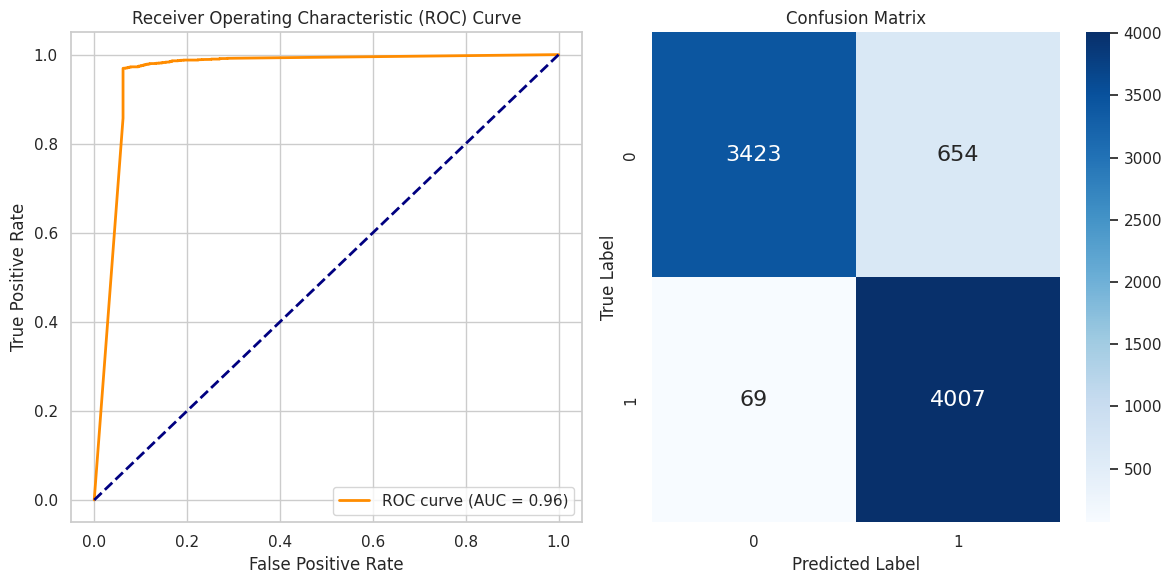

In [ ]:
build_model(X_train_pca, y_train, X_test_pca, y_test, model_type='knn', n_neighbors=4, weights='distance' , p = 2)

## Support vector machines (SVM)

In [ ]:
scaler_Robust = RobustScaler()
X_train_scaled_Robust_pca = scaler.fit_transform(X_train_pca)
X_test_scaled_Robust_pca = scaler.transform(X_test_pca)

In [ ]:
random_search(X_train_scaled_Robust_pca, y_train, model_type='svm', scoring_metric='f1')

Best hyperparameters:  {'kernel': 'rbf', 'gamma': 'auto', 'C': 1}
Best score:  0.859016806680225
Elapsed Time: 807.64 seconds


Training time: 67.47 seconds
_________________________________________
The Accuracy: 0.86%
The Recall: 0.88%
The Precision: 0.85%
The F1 Score: 0.87%
The ROC-AUC Score: 0.93%
Confusion Matrix:
[[3443  634]
 [ 470 3606]]


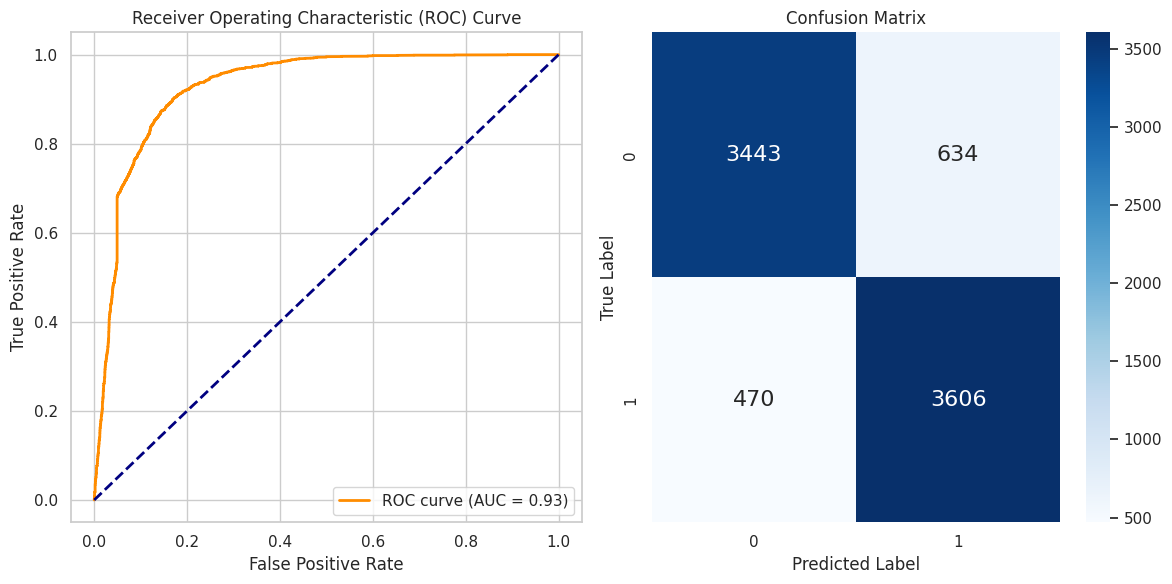

In [ ]:
build_model(X_train_scaled_Robust_pca, y_train, X_test_scaled_Robust_pca, y_test, model_type='svm' , kernel= 'rbf', gamma= 'auto', C = 1)

# Comparison of Model Scores

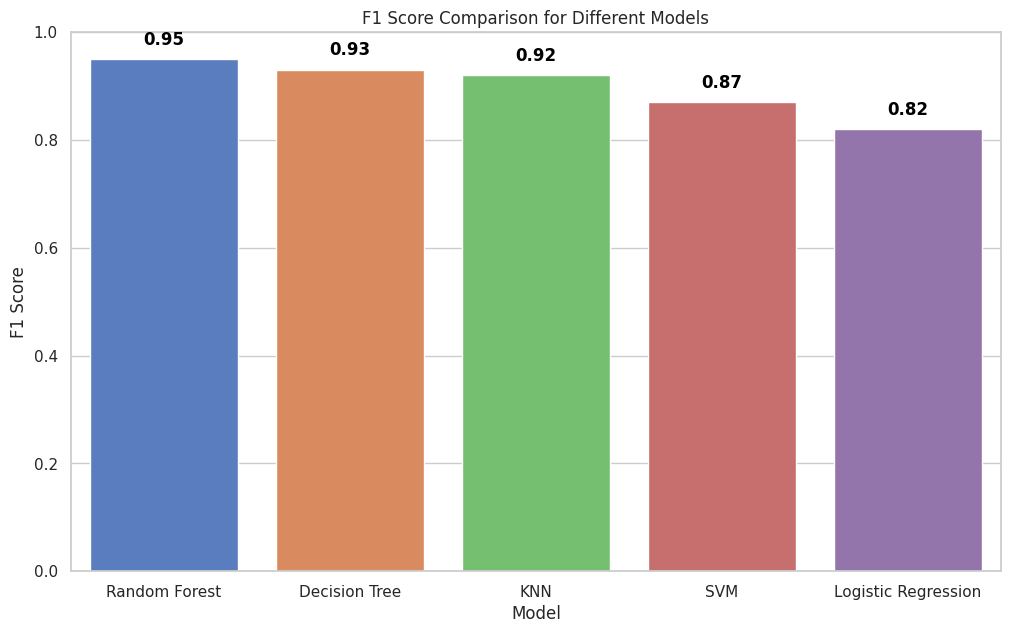

In [ ]:
models = ['Logistic Regression', 'KNN', 'Decision Tree', 'SVM', 'Random Forest']
f1_scores = [0.82, 0.92, 0.93, 0.87, 0.95]
df_f1_scores = pd.DataFrame({'Model': models, 'F1 Score': f1_scores})
df_f1_scores = df_f1_scores.sort_values(by='F1 Score', ascending=False)
plt.figure(figsize=(12, 7))
bar_plot = sns.barplot(x=df_f1_scores['Model'], y=df_f1_scores['F1 Score'], palette='muted')
plt.title('F1 Score Comparison for Different Models')
plt.xlabel('Model')
plt.ylabel('F1 Score')
plt.ylim(0, 1)

for i, v in enumerate(df_f1_scores['F1 Score']):
    bar_plot.text(i, v + 0.02, f'{v:.2f}', ha='center', va='bottom', color='black', fontweight='bold')

plt.show()

# Ensemble Methods

## Prepared (Evaluate & Plot Metrics)

In [ ]:
def evaluate_and_plot_metrics(y_train, y_pred):
    accuracy = accuracy_score(y_train, y_pred)
    precision = precision_score(y_train, y_pred)
    recall = recall_score(y_train, y_pred)
    f1 = f1_score(y_train, y_pred)
    roc_auc = roc_auc_score(y_train, y_pred)
    conf_matrix = confusion_matrix(y_train, y_pred)


    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 Score: {f1:.2f}")
    print(f"ROC AUC Score: {roc_auc:.2f}")
    print("Confusion Matrix:")
    print(conf_matrix)

    fpr, tpr, thresholds = roc_curve(y_test, y_pred)

    plt.figure(figsize=(16, 6))

    plt.subplot(1, 2, 1)
    plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], 'k--', label='Random')
    plt.title('ROC Curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend()


    plt.subplot(1, 2, 2)
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('True')

    plt.tight_layout()
    plt.show()

## Bagging



### Same model




In [ ]:
Bagging_model = BaggingClassifier(estimator=RandomForestClassifier(n_estimators= 50, min_samples_split= 5, min_samples_leaf= 1, max_depth= None, bootstrap= False) , n_estimators=500 , bootstrap=True , max_samples=100 , n_jobs=-1)

In [ ]:
Bagging_mode l.fit(X_train_pca,y_train)

BaggingClassifier(estimator=RandomForestClassifier(bootstrap=False,
                                                   min_samples_split=5,
                                                   n_estimators=50),
                  max_samples=100, n_estimators=500, n_jobs=-1)



*   Predictions 🔎



In [ ]:
y_pred_begg = Bagging_model.predict(X_test_pca)

Accuracy: 0.82
Precision: 0.83
Recall: 0.81
F1 Score: 0.82
ROC AUC Score: 0.82
Confusion Matrix:
[[3393  684]
 [ 793 3283]]


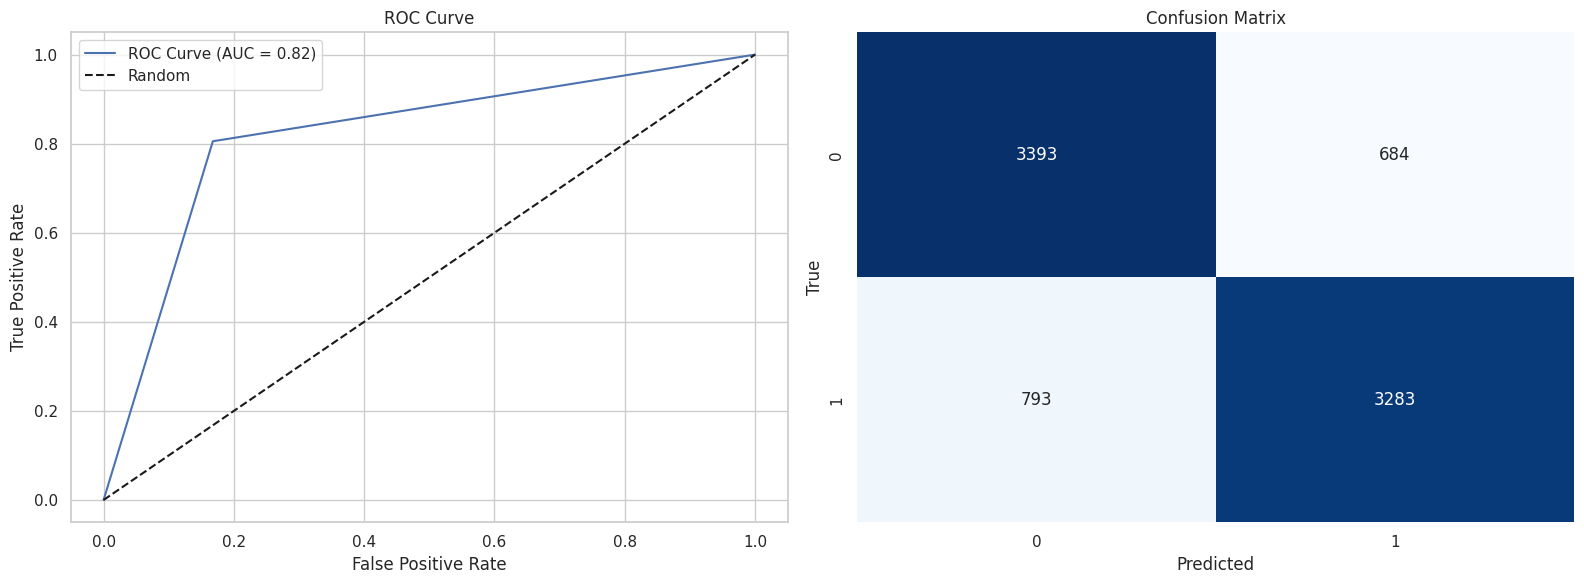

In [ ]:
evaluate_and_plot_metrics(y_test, y_pred_begg)



### Different Model



In [ ]:
models = [("Logistic Regression", LogisticRegression(C = 1, class_weight= None, max_iter = 100, multi_class='auto', penalty= "l1", solver= 'saga')),
          ("DecisionTree Classifier", DecisionTreeClassifier(criterion = 'entropy', max_depth = 30, max_features = None, min_samples_leaf = 1, min_samples_split=2, random_state= 42, splitter= 'best')),
          ("SVM", SVC(probability=True , kernel= 'rbf', gamma= 'auto', C = 1)),
          ("Random Forest", RandomForestClassifier(n_estimators= 50, min_samples_split= 5, min_samples_leaf= 1, max_depth= None, bootstrap= False))]

In [ ]:
voting_classifier = VotingClassifier(estimators=models)

In [ ]:
bagging_classifier = BaggingClassifier(base_estimator=voting_classifier, n_estimators=10, random_state=42)



*   Cross-Validation Mean Accuracy ⤵



In [ ]:
model_names = []
mean_accuracies = []

for name, model in models:
    cv_scores = cross_val_score(model, X_train_scaled_Robust_pca, y_train, cv=5 , scoring="f1")
    mean_accuracy = np.mean(cv_scores)

    model_names.append(name)
    mean_accuracies.append(mean_accuracy)

    print(f"{name} Cross-Validation Mean Accuracy: {mean_accuracy:.2f}")

Logistic Regression Cross-Validation Mean Accuracy: 0.82
DecisionTree Classifier Cross-Validation Mean Accuracy: 0.91
SVM Cross-Validation Mean Accuracy: 0.86
Random Forest Cross-Validation Mean Accuracy: 0.94


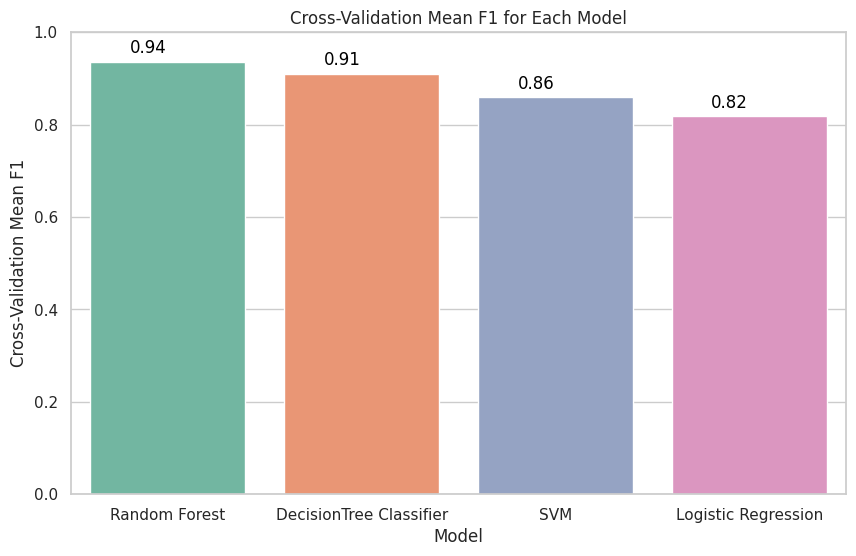

In [ ]:
sorted_indices = np.argsort(mean_accuracies)[::-1]
sorted_model_names = [model_names[i] for i in sorted_indices]
sorted_mean_accuracies = [mean_accuracies[i] for i in sorted_indices]
sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
bars = sns.barplot(x=sorted_model_names, y=sorted_mean_accuracies, palette='Set2')

for bar, accuracy in zip(bars.patches, sorted_mean_accuracies):
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.1, bar.get_height() + 0.01, f'{accuracy:.2f}', ha='center', va='bottom', color='black')

plt.xlabel('Model')
plt.ylabel('Cross-Validation Mean F1')
plt.title('Cross-Validation Mean F1 for Each Model')
plt.ylim([0, 1])

plt.show()



*   Voting Classifier ⤵




In [ ]:
import warnings
warnings.filterwarnings("ignore")
bagging_classifier.fit(X_train_scaled_Robust_pca, y_train)

BaggingClassifier(base_estimator=VotingClassifier(estimators=[('Logistic '
                                                               'Regression',
                                                               LogisticRegression(C=1,
                                                                                  penalty='l1',
                                                                                  solver='saga')),
                                                              ('DecisionTree '
                                                               'Classifier',
                                                               DecisionTreeClassifier(criterion='entropy',
                                                                                      max_depth=30,
                                                                                      random_state=42)),
                                                              ('SVM',
                                                               SVC(C=1,
                                                                   gamma='auto',
                                                                   probability=True)),
                                                              ('Random Forest',
                                                               RandomForestClassifier(bootstrap=False,
                                                                                      min_samples_split=5,
                                                                                      n_estimators=50))]),
                  random_state=42)



*   Predictions 🔎



In [ ]:
bagg_predictions = bagging_classifier.predict(X_test_pca)

Accuracy: 0.86
Precision: 0.90
Recall: 0.81
F1 Score: 0.85
ROC AUC Score: 0.86
Confusion Matrix:
[[3716  361]
 [ 792 3284]]


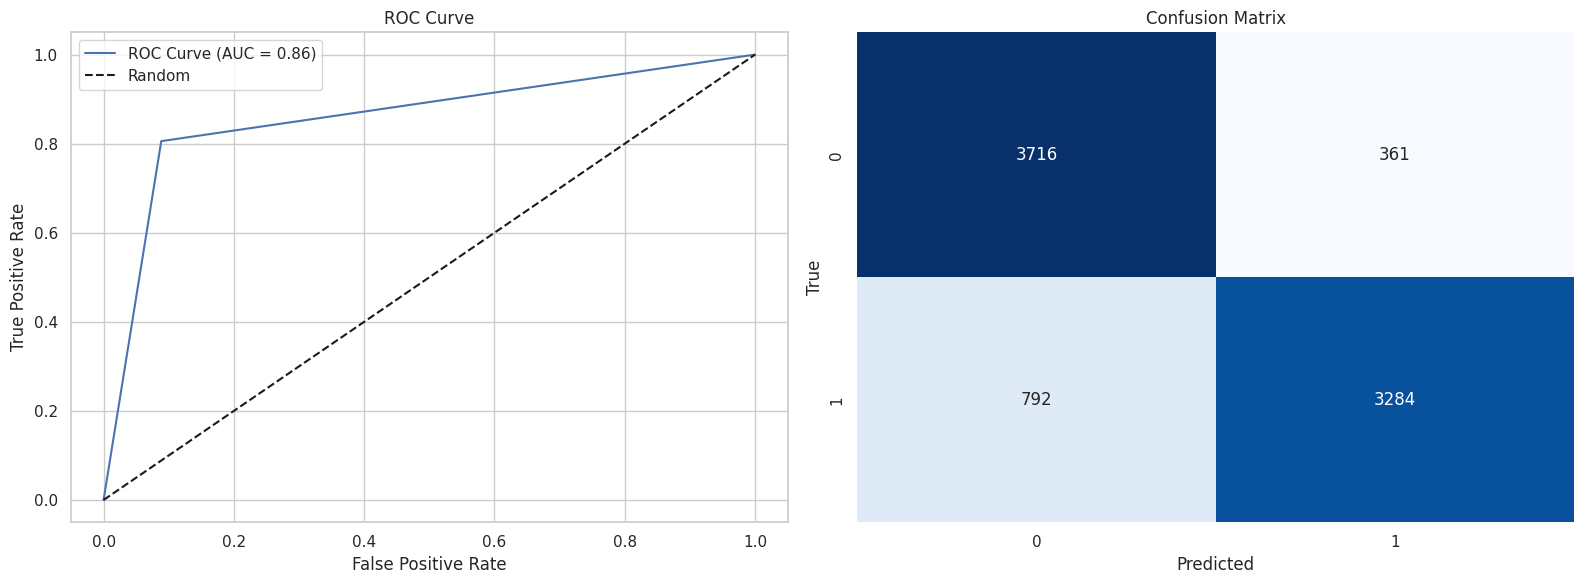

In [ ]:
evaluate_and_plot_metrics(y_test, bagg_predictions)

## Stacking

In [ ]:
estimators = [('dt', DecisionTreeClassifier(criterion = 'entropy', max_depth = 30, max_features = None, min_samples_leaf = 1, min_samples_split=2, random_state= 42, splitter= 'best')),
              ('knn', KNeighborsClassifier(n_neighbors=4, weights='distance' , p = 2)),
              ('rf', RandomForestClassifier(n_estimators= 50, min_samples_split= 5, min_samples_leaf= 1, max_depth= None, bootstrap= False))]

In [ ]:
Stacking_model = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())

In [ ]:
Stacking_model.fit(X_train_pca, y_train)

StackingClassifier(estimators=[('dt',
                                DecisionTreeClassifier(criterion='entropy',
                                                       max_depth=30,
                                                       random_state=42)),
                               ('knn',
                                KNeighborsClassifier(n_neighbors=4,
                                                     weights='distance')),
                               ('rf',
                                RandomForestClassifier(bootstrap=False,
                                                       min_samples_split=5,
                                                       n_estimators=50))],
                   final_estimator=LogisticRegression())



*   Predictions 🔎



In [ ]:
y_pred_stacking = Stacking_model.predict(X_test_pca)

Accuracy: 0.96
Precision: 0.94
Recall: 0.98
F1 Score: 0.96
ROC AUC Score: 0.96
Confusion Matrix:
[[3837  240]
 [  96 3980]]


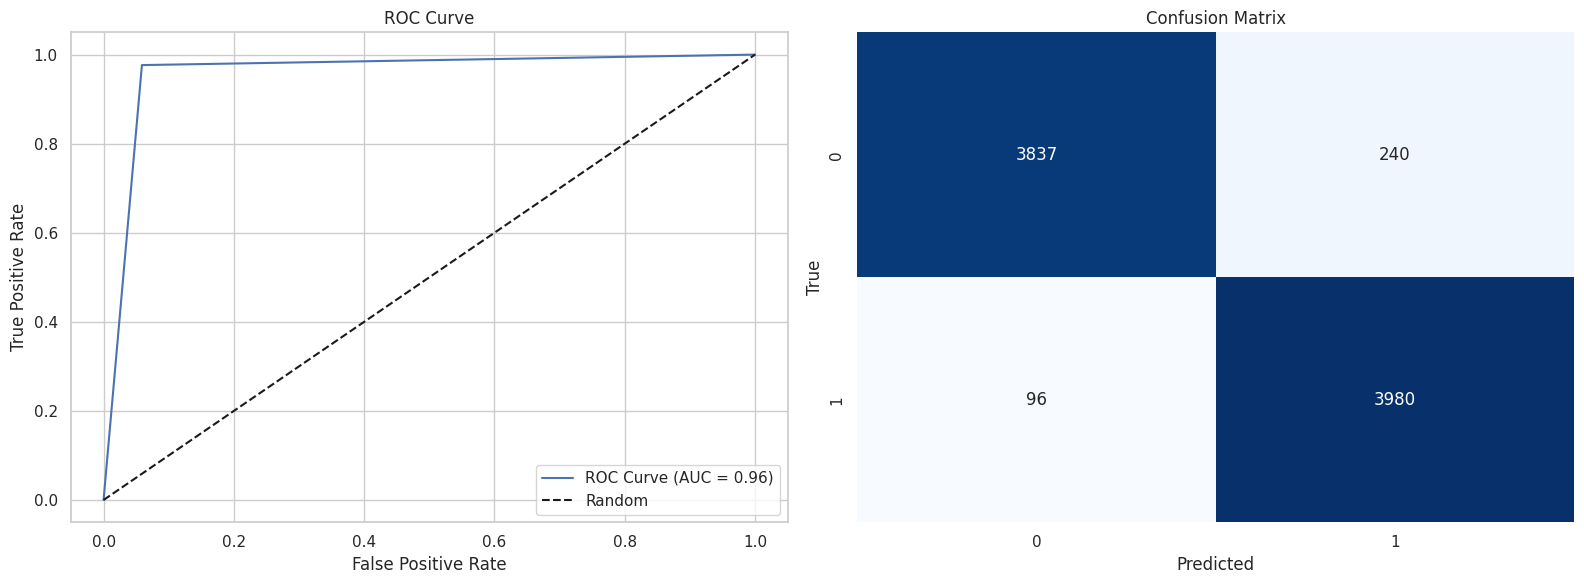

In [ ]:
evaluate_and_plot_metrics(y_test, y_pred_stacking)

## Boosting

### AdaBoost 💡

In [ ]:
base_model_params = {
    'criterion': 'entropy',
    'max_depth': 30,
    'max_features': None,
    'min_samples_leaf': 1,
    'min_samples_split': 2,
    'random_state': 42,
    'splitter': 'best'
}

In [ ]:
base_model = DecisionTreeClassifier(**base_model_params)

In [ ]:
adaboost_params = {
    'base_estimator': base_model,
    'n_estimators': 200,
    'learning_rate': 0.1,
    'random_state': 42
}
adaboost_classifier = AdaBoostClassifier(**adaboost_params)

In [ ]:
adaboost_classifier.fit(X_train_pca, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(criterion='entropy',
                                                         max_depth=30,
                                                         random_state=42),
                   learning_rate=0.1, n_estimators=200, random_state=42)



*   Predictions 🔎



In [ ]:
adaboost_predictions = adaboost_classifier.predict(X_test_pca)

Accuracy: 0.93
Precision: 0.90
Recall: 0.98
F1 Score: 0.93
ROC AUC Score: 0.93
Confusion Matrix:
[[3616  461]
 [  97 3979]]


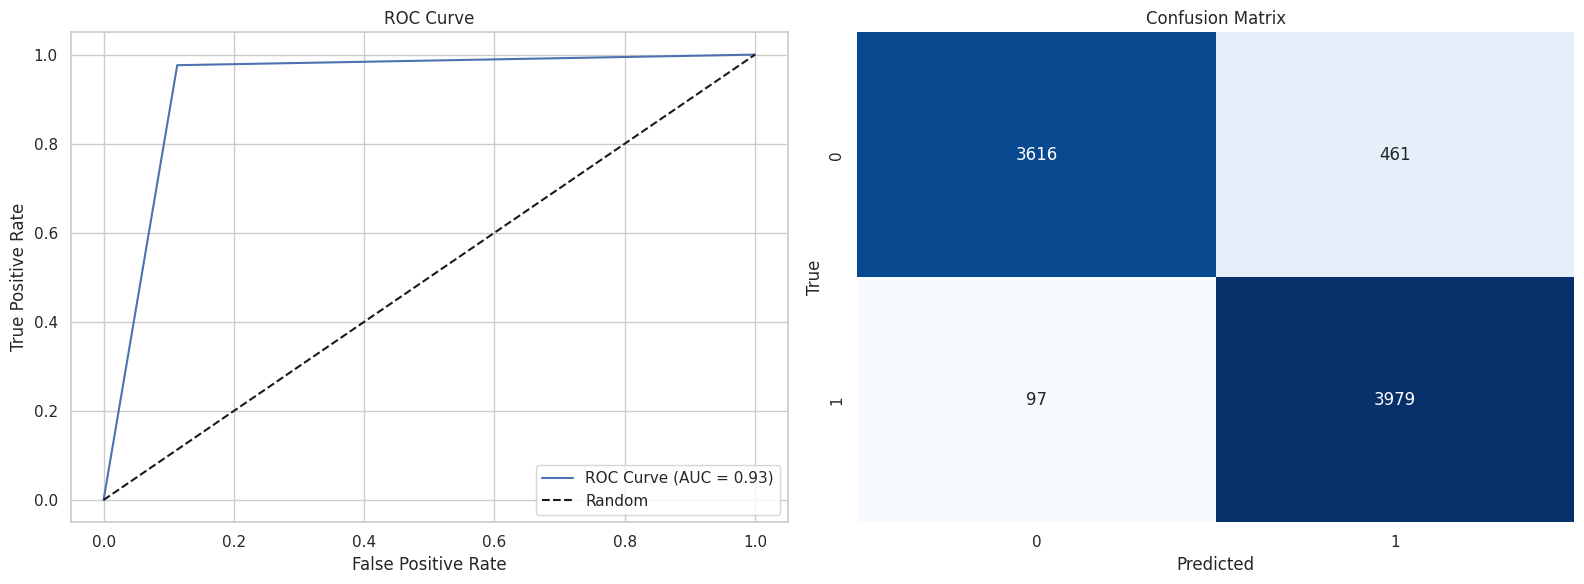

In [ ]:
evaluate_and_plot_metrics(y_test , adaboost_predictions)

### Gradient Boost 💪

In [ ]:
gradient_boosting_classifier = GradientBoostingClassifier(
    n_estimators=300,
    learning_rate=0.1,
    max_depth=3,
    random_state=42
)

In [ ]:
gradient_boosting_classifier.fit(X_train_pca, y_train)

GradientBoostingClassifier(n_estimators=300, random_state=42)



*   Predictions 🔎



In [ ]:
gb_predictions = gradient_boosting_classifier.predict(X_test_pca)

Accuracy: 0.87
Precision: 0.87
Recall: 0.87
F1 Score: 0.87
ROC AUC Score: 0.87
Confusion Matrix:
[[3529  548]
 [ 545 3531]]


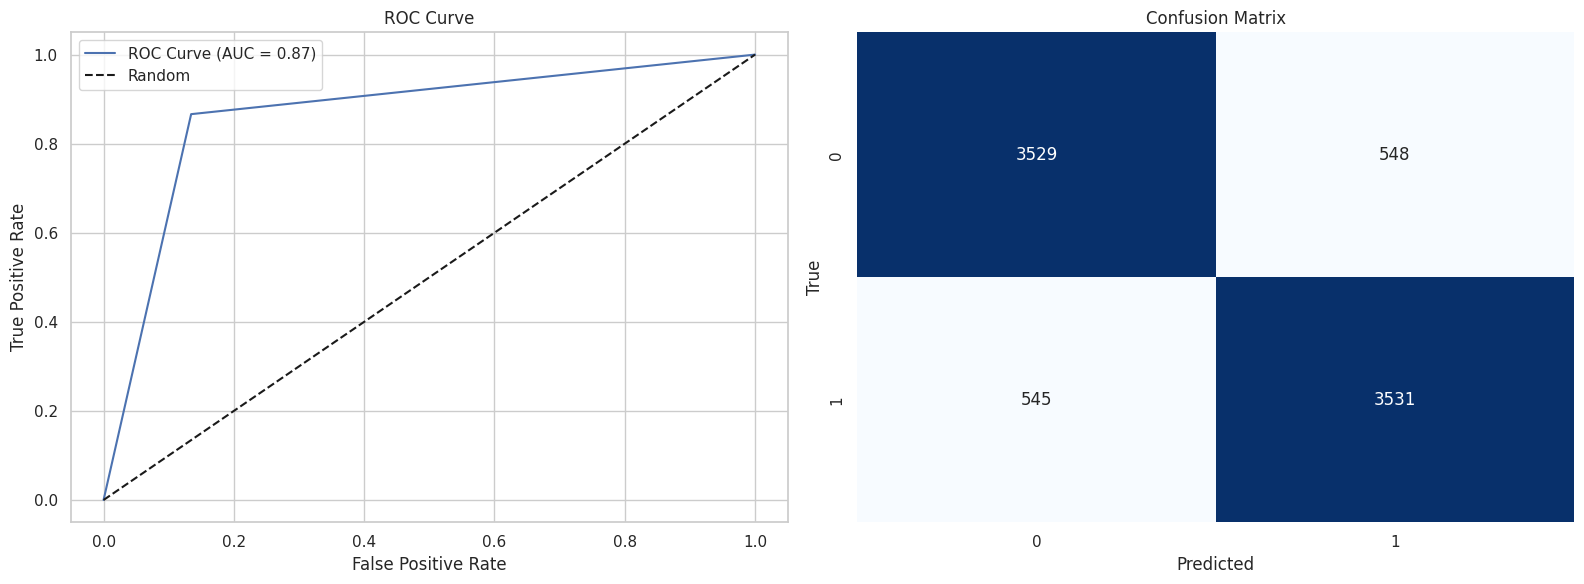

In [ ]:
evaluate_and_plot_metrics(y_test,gb_predictions)

### XGBoost ⚡

In [ ]:
xgb_model = xgb.XGBClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=3,
    objective="binary:logistic",
    random_state=42
)

In [ ]:
xgb_model.fit(X_train_pca, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)



*   Predictions 🔎



In [ ]:
y_pred_xgb = xgb_model.predict(X_test_pca)

Accuracy: 0.85
Precision: 0.86
Recall: 0.84
F1 Score: 0.85
ROC AUC Score: 0.85
Confusion Matrix:
[[3509  568]
 [ 672 3404]]


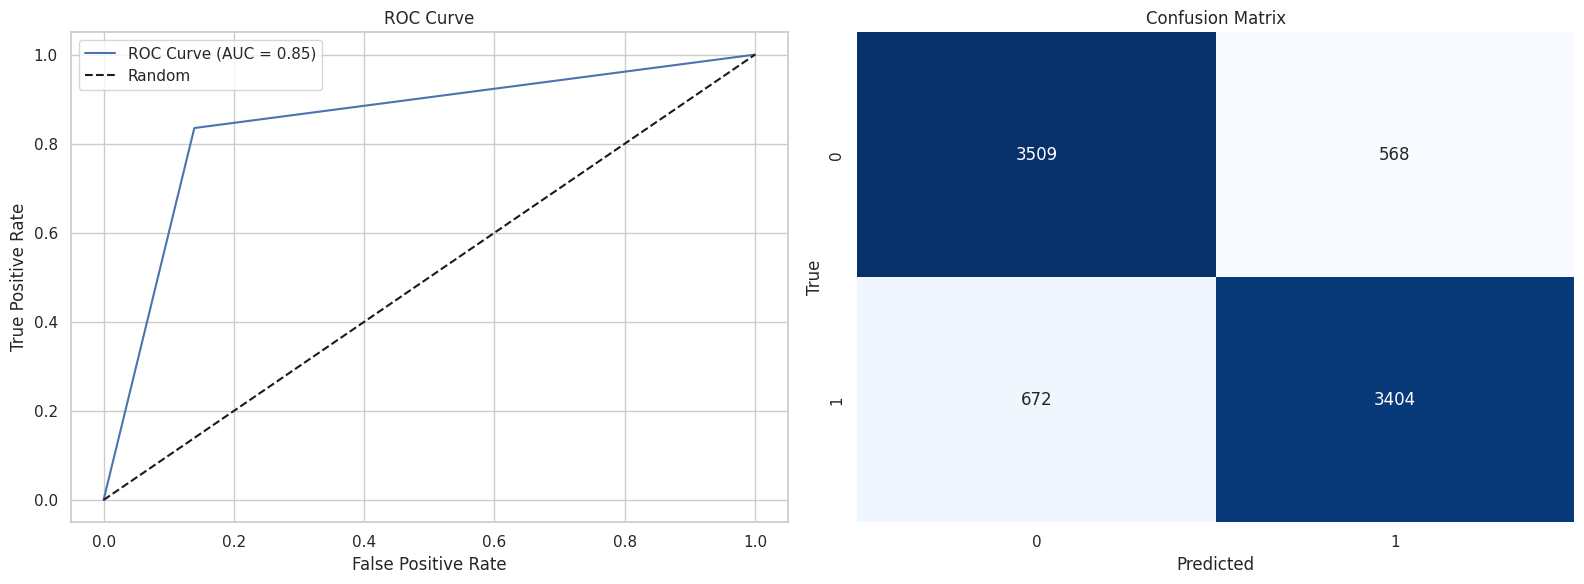

In [ ]:
evaluate_and_plot_metrics(y_test ,y_pred_xgb )

# Comparison of Ensemble Scores

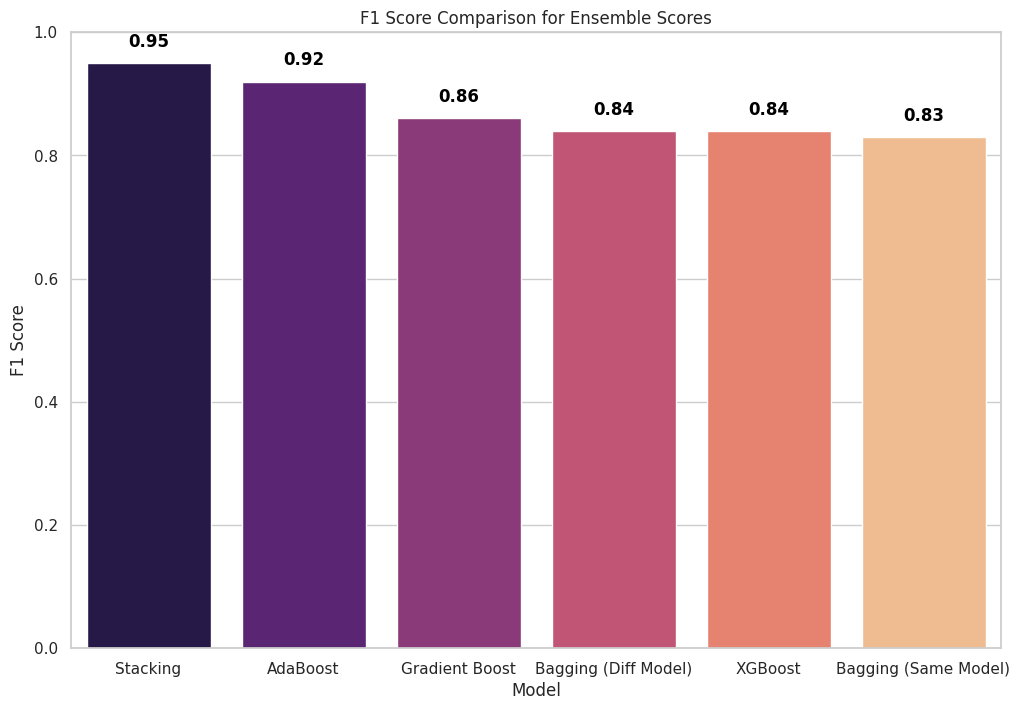

In [ ]:
models = ['Bagging (Same Model)', 'Bagging (Diff Model)', 'Stacking', 'AdaBoost', 'Gradient Boost', 'XGBoost']
f1_scores = [0.83, 0.84, 0.95, 0.92, 0.86 , 0.84]
df_f1_scores = pd.DataFrame({'Model': models, 'F1 Score': f1_scores})
df_f1_scores = df_f1_scores.sort_values(by='F1 Score', ascending=False)
plt.figure(figsize=(12, 8))
bar_plot = sns.barplot(x=df_f1_scores['Model'], y=df_f1_scores['F1 Score'], palette='magma')
plt.title('F1 Score Comparison for Ensemble Scores')
plt.xlabel('Model')
plt.ylabel('F1 Score')
plt.ylim(0, 1)

for i, v in enumerate(df_f1_scores['F1 Score']):
    bar_plot.text(i, v + 0.02, f'{v:.2f}', ha='center', va='bottom', color='black', fontweight='bold')

plt.show()

# 📊 Final Result ⚖

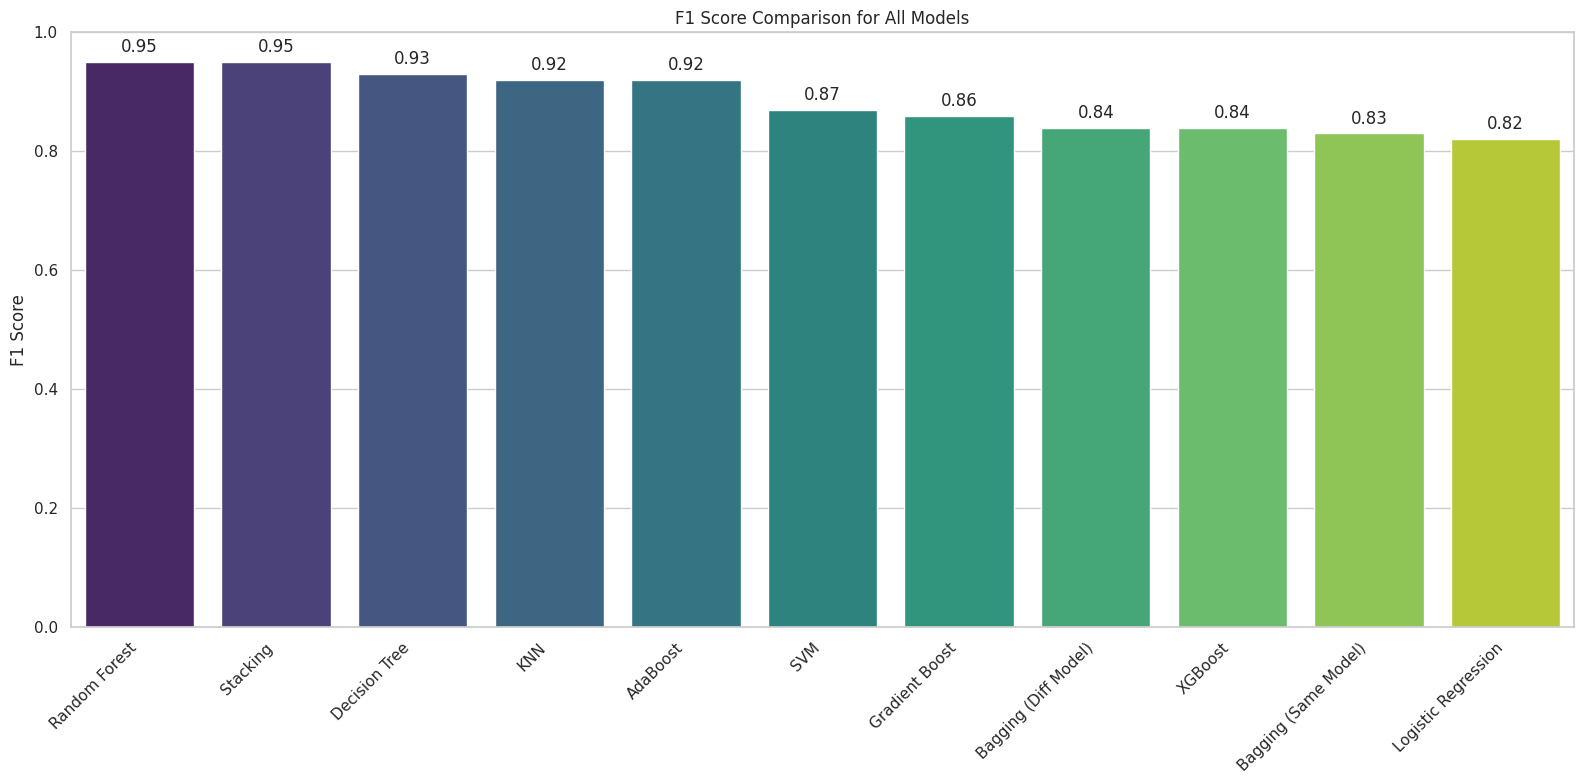

In [ ]:
all_models = ['Logistic Regression', 'KNN', 'Decision Tree', 'SVM', 'Random Forest',
              'Bagging (Same Model)', 'Bagging (Diff Model)', 'Stacking', 'AdaBoost', 'Gradient Boost', 'XGBoost']

all_f1_scores = [0.82, 0.92, 0.93, 0.87, 0.95,
                 0.83, 0.84, 0.95, 0.92, 0.86, 0.84]

sorted_indices_all = sorted(range(len(all_f1_scores)), key=lambda k: all_f1_scores[k], reverse=True)
plt.figure(figsize=(16, 8))
sns.barplot(x=[all_models[i] for i in sorted_indices_all], y=[all_f1_scores[i] for i in sorted_indices_all], palette='viridis')
plt.title('F1 Score Comparison for All Models')
plt.ylim(0, 1)
plt.ylabel('F1 Score')
plt.xticks(rotation=45, ha='right')

for i, index in enumerate(sorted_indices_all):
    plt.text(i, all_f1_scores[index] + 0.01, f'{all_f1_scores[index]:.2f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

endd_time = time.time()

 Model Performance 🚀 &  Rankings 🏆



*   Rejoice, for the **F1 Score** shines at an impressive **95%** 🌟

*   **Random Forest** Takes the lead with a solid **95%** performance.❤️






In [ ]:
elapsed_time_seconds = end_time - start_time
elapsed_time_minutes = elapsed_time_seconds / 60
print(f"Elapsed Time: {elapsed_time_minutes:.2f} minutes")

Elapsed Time: 3987.1413810253143 seconds
